# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**TEAM ZF1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Modeling</a>

<a href=#five>5. Model Performance</a>

<a href=#six>6. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Libraries for data preparation and model building
import statsmodels.graphics.api as sga
import statsmodels.formula.api as sfa
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score

# print multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [11]:
df1 = pd.read_csv("df_train.csv")
print(f"There are {df1.shape[0]} rows and {df1.shape[1]} columns")
df1.head(2)
print('', end="\n\n")

# Remove unnecessary column(s)

df_train = df1.drop(labels="Unnamed: 0", axis=1)
print(f"There are {df_train.shape[0]} rows and {df_train.shape[1]} columns")
df_train.head(10).T
print('', end="\n\n")

There are 8763 rows and 49 columns


Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0                1.0  ...       265.938000      281.013000   
1                0.0                1.0  ...       266.386667      280.561667   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  

[2 rows x 49 columns]



There are 8763 rows and 48 columns


0                    1  \
time                  2015-01-01 03:00:00  2015-01-01 06:00:00   
Madrid_wind_speed                0.666667             0.333333   
Valencia_wind_deg                 level_5             level_10   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed              0.666667             1.666667   
Seville_humidity                74.333333            78.333333   
Madrid_humidity                      64.0            64.666667   
Bilbao_clouds_all                     0.0                  0.0   
Bilbao_wind_speed                     1.0                  1.0   
Seville_clouds_all                    0.0                  0.0   
Bilbao_wind_deg                223.333333                221.0   
Barcelona_wind_speed             6.333333                  4.0   
Barcelona_wind_deg              42.666667                139.0   
Madrid_clouds_all                     0.0                  0.0   
Seville_wind_speed               3.333333             3.333333   
Barcelona_rain_1h                     0.0                  0.0   
Seville_pressure                     sp25                 sp25   
Seville_rain_1h                       0.0                  0.0   
Bilbao_snow_3h                        0.0                  0.0   
Barcelona_pressure            1036.333333          1037.333333   
Seville_rain_3h                       0.0                  0.0   
Madrid_rain_1h                        0.0                  0.0   
Barcelona_rain_3h                     0.0                  0.0   
Valencia_snow_3h                      0.0                  0.0   
Madrid_weather_id                   800.0                800.0   
Barcelona_weather_id                800.0                800.0   
Bilbao_pressure                    1035.0          1035.666667   
Seville_weather_id                  800.0                800.0   
Valencia_pressure             1002.666667          1004.333333   
Seville_temp_max               274.254667              274.945   
Madrid_pressure                971.333333           972.666667   
Valencia_temp_max                 269.888           271.728333   
Valencia_temp                     269.888           271.728333   
Bilbao_weather_id                   800.0                800.0   
Seville_temp                   274.254667              274.945   
Valencia_humidity               75.666667                 71.0   
Valencia_temp_min                 269.888           271.728333   
Barcelona_temp_max                281.013           280.561667   
Madrid_temp_max                   265.938           266.386667   
Barcelona_temp                    281.013           280.561667   
Bilbao_temp_min                269.338615              270.376   
Bilbao_temp                    269.338615              270.376   
Barcelona_temp_min                281.013           280.561667   
Bilbao_temp_max                269.338615              270.376   
Seville_temp_min               274.254667              274.945   
Madrid_temp                       265.938           266.386667   
Madrid_temp_min                   265.938           266.386667   
load_shortfall_3h             6715.666667          4171.666667   

                                        2                    3  \
time                  2015-01-01 09:00:00  2015-01-01 12:00:00   
Madrid_wind_speed                     1.0                  1.0   
Valencia_wind_deg                 level_9              level_8   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed                   1.0                  1.0   
Seville_humidity                71.333333            65.333333   
Madrid_humidity                 64.333333            56.333333   
Bilbao_clouds_all                     0.0                  0.0   
Bilbao_wind_speed                     1.0                  1.0   
Seville_clouds_all                    0.0                  0.0   
Bilbao_wind_deg                214.333333           199.666667   
Barcelona_win

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA) and Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### 3.1. Data statistics

In [12]:
# Function to describe variable (including mode and median)

def describe(df):
    d = {0:[df.mean(), df.median(), df.mode()[0]]}
    dat = pd.DataFrame(data=d).rename(index={0: "Mean", 1: "Median", 2: "Mode"})
    return pd.concat([df.describe(), dat])

# Data comprehension

print(f"There are {df_train.isnull().sum().sum()} null values")
df_train.isnull().sum()
print('', end="\n\n")

print("Description of Valencia_pressure")
describe(df_train["Valencia_pressure"])

# Deal with null containing column(s)

df_train_clean = df_train.copy()
df_train_clean["Valencia_pressure"] = df_train_clean["Valencia_pressure"].fillna(df_train_clean["Valencia_pressure"].mode()[0])
print('', end="\n\n")

print(f"There are {df_train_clean.isnull().sum().sum()} null values after subtituting with the mode")
df_train_clean.isnull().sum()
print('', end="\n\n")

print("Description of cleaned Valencia_pressure")
describe(df_train_clean["Valencia_pressure"])
print('', end="\n\n")

# Access column dtypes

df_train_clean.info()
print('', end="\n\n")

# Convert object dtypes to float

df_train_clean["Valencia_wind_deg"] = df_train_clean["Valencia_wind_deg"].str.extract("(\d+)").astype(int)
df_train_clean["Seville_pressure"] = df_train_clean["Seville_pressure"].str.extract("(\d+)").astype(int)
df_train_clean["time"] = pd.to_datetime(df_train_clean["time"])
print("Time, Valencia_wind_deg, Seville_pressure columns has been respectively converted to:")
print(df_train_clean["time"].dtypes)
print(df_train_clean["Valencia_wind_deg"].dtypes)
print(df_train_clean["Seville_pressure"].dtypes)
print('', end="\n\n")

# extract features from date

df_train_clean["time_year"] = df_train_clean["time"].dt.year.astype(int)
df_train_clean["time_month"] = df_train_clean["time"].dt.month.astype(int)
df_train_clean["time_day"] = df_train_clean["time"].dt.day.astype(int)
df_train_clean['time_dayofyear'] = df_train_clean['time'].dt.dayofyear.astype(int)
df_train_clean["time_hour"] = df_train_clean["time"].dt.hour.astype(int)
df_train_clean["time_weekday"] = df_train_clean["time"].dt.weekday.astype(int) # Monday is 0 and Sunday is 6
df_train_clean["time_weeknumber"] = df_train_clean["time"].dt.week.astype(int)

# Sort columns and drop noise ("time")

df_train_clean_sort = df_train_clean[sorted(df_train_clean)]
df_train_clean_sort = df_train_clean_sort.drop(labels="time", axis=1)
df_train_clean_sort.info()
print('', end="\n\n")

# Univariable non-Graphical Analysis

print(f"Univariable non-Graphical Analysis")
print(f"There are {df_train_clean_sort.shape[0]} rows and {df_train_clean_sort.shape[1]} columns")
df_train_clean_sort.describe().T
print(f"There are 5 cities; Barcelona, Bilbao, Madrid, Seville, Valencia", end="\n"
      "There are 5 variables reoccuring across all cities; Pressure, temp, temp_max, temp_min, wind_speed")

There are 2068 null values


time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  



Description of Valencia_pressure


0
count   6695.000000
mean    1012.051407
std        9.506214
min      972.666667
25%     1010.333333
50%     1015.000000
75%     1018.000000
max     1021.666667
Mean    1012.051407
Median  1015.000000
Mode    1018.000000



There are 0 null values after subtituting with the mode


time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_



Description of cleaned Valencia_pressure


0
count   8763.000000
mean    1013.455228
std        8.684485
min      972.666667
25%     1012.666667
50%     1017.000000
75%     1018.000000
max     1021.666667
Mean    1013.455228
Median  1017.000000
Mode    1018.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h  

count          mean           std          min  \
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Seville_pressure      8763.0     13.507246      7.237267     1.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_pressure     8763.0   1013.455228      8.684485   972.666667   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Valencia_wind_deg     8763.0      5.276389      2.877642     1.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   
time_day              8763.0     15.740157      8.798664     1.000000   
time_dayofyear        8763.0    183.262924    105.421802     1.000000   
time_hour             8763.0     10.498459      6.874031     0.000000   
time_month            8763.0      6.524820      3.447976     1.000000   
time_weekday          8763.0      3.005478      1.999193     0.000000   
time_weeknumber       8763.0     26.752596     15.063472     1.000000   
time_year             8763.0   2016.000571      0.816054  2015.000000   

       

There are 5 cities; Barcelona, Bilbao, Madrid, Seville, Valencia
There are 5 variables reoccuring across all cities; Pressure, temp, temp_max, temp_min, wind_speed

In [13]:
# check columns containing negative values

df_train_clean_sort.columns[(df_train_clean_sort < 0).any()].tolist()
df_train_clean_sort[(df_train_clean_sort[df_train_clean_sort.columns] < 0).any(axis=1)][['load_shortfall_3h']].T

['load_shortfall_3h']

8            9       10      13           17    \
load_shortfall_3h -1850.333333 -4002.333333 -2893.0 -1317.0 -2679.333333   

                     18      21           191    192          230   ...  \
load_shortfall_3h -1478.0 -2013.0 -1007.333333 -298.0 -2950.666667  ...   

                         8717    8724         8725         8733         8741  \
load_shortfall_3h -238.666667 -3467.0 -6292.666667 -3311.666667 -2451.333333   

                     8749         8750        8757       8758   8761  
load_shortfall_3h -4277.0 -1874.333333 -380.666667 -28.333333 -760.0  

[1 rows x 317 columns]

### 3.2. Plot relevant feature interactions (correlation and linearity)

In [14]:
# Prepare to observe interactions

y_0 = df_train_clean_sort[["load_shortfall_3h"]]
x_0 = df_train_clean_sort.drop(labels="load_shortfall_3h", axis=1)

y_0.head(2)
y_0.shape

x_0.head(2)
x_0.shape

load_shortfall_3h
0        6715.666667
1        4171.666667

(8763, 1)

Barcelona_pressure  Barcelona_rain_1h  Barcelona_rain_3h  Barcelona_temp  \
0         1036.333333                0.0                0.0      281.013000   
1         1037.333333                0.0                0.0      280.561667   

   Barcelona_temp_max  Barcelona_temp_min  Barcelona_weather_id  \
0          281.013000          281.013000                 800.0   
1          280.561667          280.561667                 800.0   

   Barcelona_wind_deg  Barcelona_wind_speed  Bilbao_clouds_all  ...  \
0           42.666667              6.333333                0.0  ...   
1          139.000000              4.000000                0.0  ...   

   Valencia_temp_min  Valencia_wind_deg  Valencia_wind_speed  time_day  \
0         269.888000                  5             0.666667         1   
1         271.728333                 10             1.666667         1   

   time_dayofyear  time_hour  time_month  time_weekday  time_weeknumber  \
0               1          3           1             3                1   
1               1          6           1             3                1   

   time_year  
0       2015  
1       2015  

[2 rows x 53 columns]

(8763, 53)

#### 3.2.3. Investigate all variables

In [15]:
# Function to check for linearity
# Due to the number of visuals created, this function takes some time to run

def scatter_plot(predictor, response, plotrow=1, plotcolumn=1, figsize=(4,3)):
    fig, axs = plt.subplots(plotcolumn,plotrow, figsize=figsize)
    fig.subplots_adjust(hspace = 0.5, wspace=.2)
    axs = axs.ravel()

    for index, column in enumerate(predictor.columns):
        axs[index].title.set_text("{} vs. Y".format(column))
        predictor_plots = axs[index].scatter(x=predictor[column],y=response, color="blue", edgecolor="white")

    fig.tight_layout(pad=1)

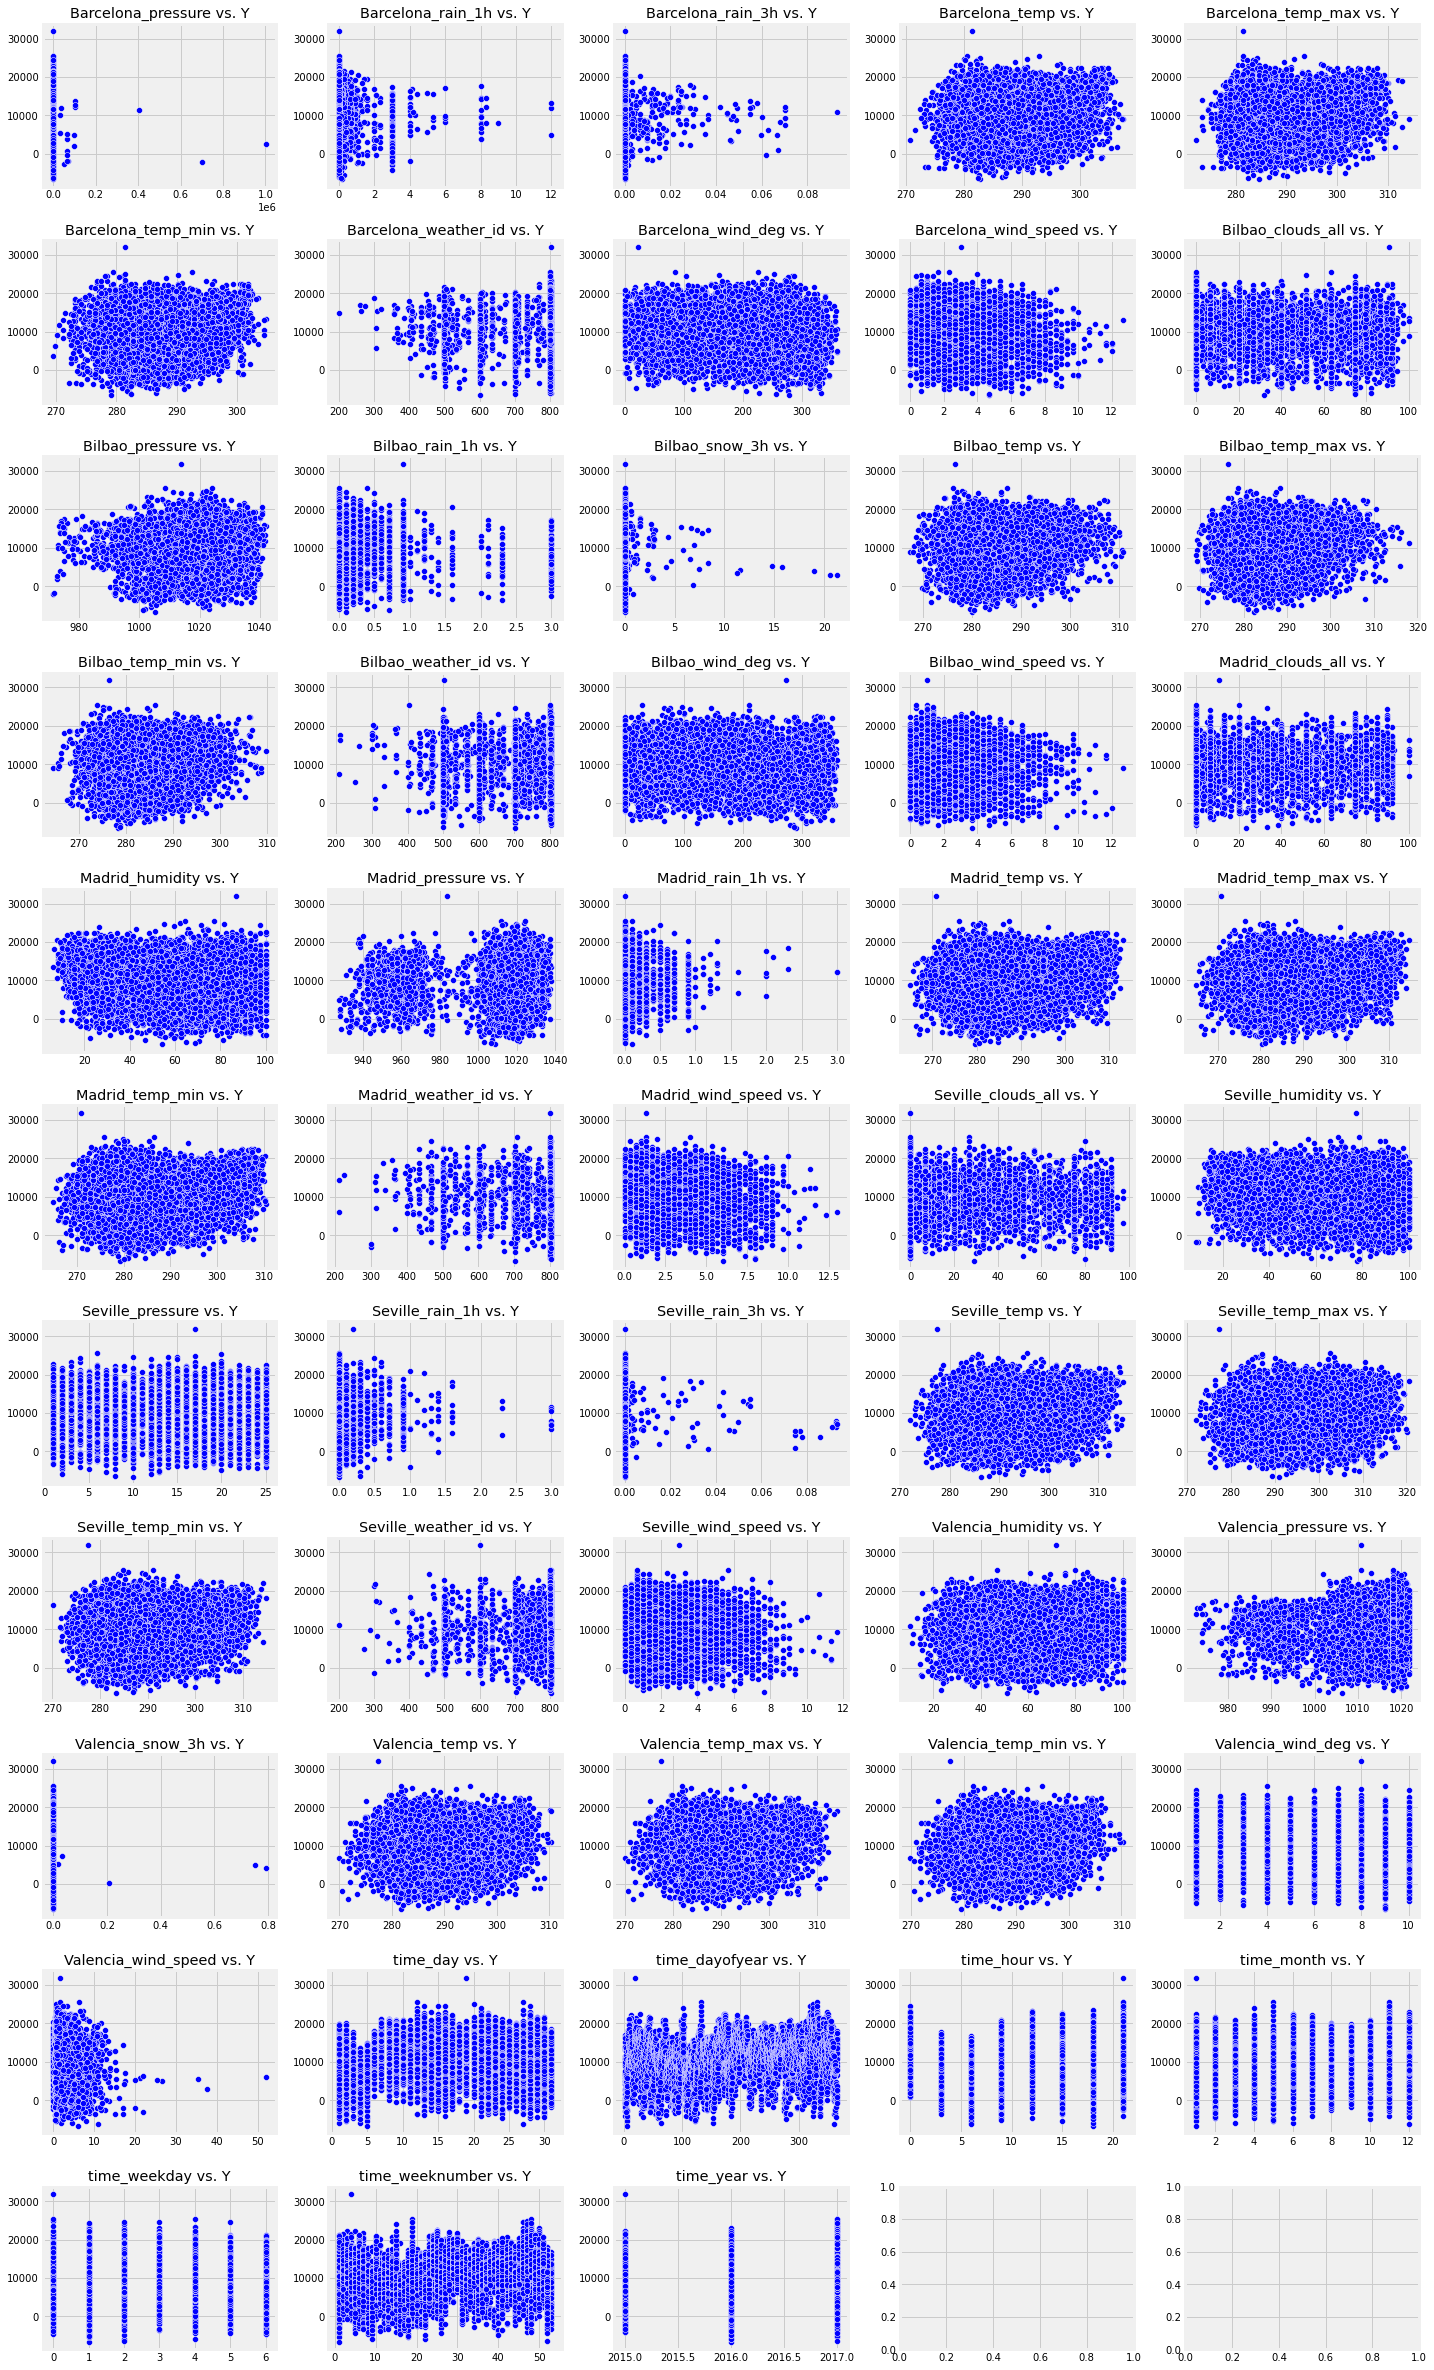

In [17]:
# Check for linearity between all predictor vairiables and y_0

scatter_plot(x_0, y_0, plotrow=5, plotcolumn=11, figsize=(20,33))

In [18]:
# Correlations between predictor variables and response variable

df_xy = x_0.join(y_0)

# Function to get correlation coefficients and p-values of each x to y

def p_values(df, y="load_shortfall_3h", dec_place=6, p_value_threshold=0.1):
    corrs = df.corr()[y]
    dict_cp = {}

    column_titles = [col for col in corrs.index if col!=y]
    for col in column_titles:
        p_val = round(pearsonr(df[col], df[y])[1],dec_place)
        dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                        'P_Value':p_val}

    df_cp = pd.DataFrame(dict_cp).T
    df_cp_sorted = df_cp.sort_values('P_Value')
    return df_cp_sorted[df_cp_sorted['P_Value']<p_value_threshold]

# Correlation and p-value of x and y

df_p_values = p_values(df_xy, dec_place=6, p_value_threshold=0.05).sort_index()
df_p_values.shape

(53, 2)

['Barcelona_temp',
 'Barcelona_temp',
 'Barcelona_temp',
 'Barcelona_temp',
 'Barcelona_temp',
 'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_max',
 'Barcelona_temp_max',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp',
 'Madrid_temp',
 'Madrid_temp',
 'Madrid_temp',
 'Madrid_temp',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_max',
 'Madrid_temp_max',
 'Madrid_temp_max',
 'Madrid_temp_max',
 'Madrid_temp_max',
 'Madrid_temp_max',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Madrid_temp_min',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp',
 'Seville_temp',
 'Seville_temp',
 'Seville_temp_max',
 'Seville_temp_min',
 'Seville_temp_min',
 'Seville_temp_min',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp',
 'Valencia_temp',
 'Valencia_temp',
 'Valencia_temp',
 'Valencia_temp',
 'Valencia_temp_max',
 'Valencia_temp_max',
 '

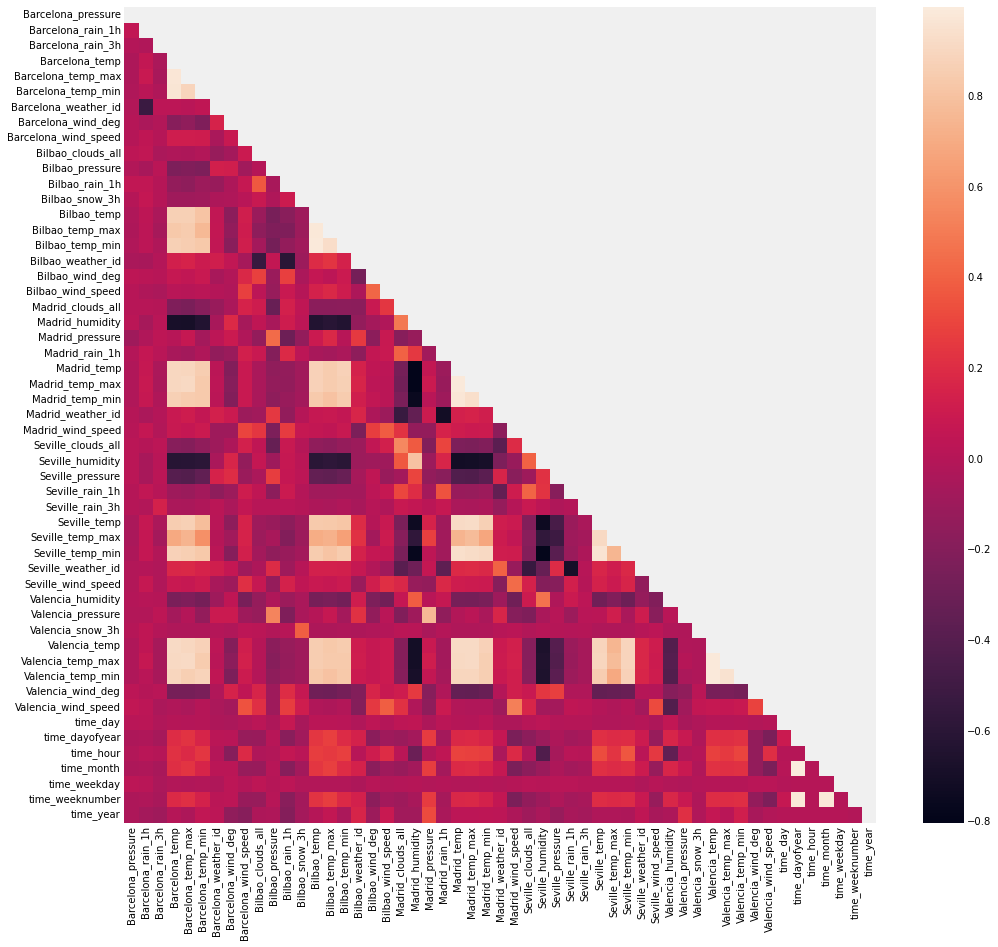

In [19]:
# Function to show predictor correlation heatmap and list columns with high correlation

def corr_heatmap(corr, diag_len, corr_threshold, annot=False):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with plt.rc_context():
        plt.rc("figure", figsize=(diag_len, diag_len))
        predictor_corrs_fig = sns.heatmap(corr, mask=mask, annot=annot)

    r, c = np.where(np.abs(corr) > corr_threshold)
    off_diagonal = np.where(r != c)
    corr_list = [row for row in corr.iloc[r[off_diagonal], c[off_diagonal]].index]
    return corr_list

# Show all predictors correlation heatmap and list columns with high correlation

predictor_corrs = x_0.corr()
corr_heatmap(predictor_corrs, diag_len=15, corr_threshold=0.9)

#### 3.2.3. Investigate temperature

In [20]:
# Function to draw time series (ts) plot

def ts_plot(df, x, y, title="", xlabel='Time', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

# Function to show y_0 time series (ts) plot
    
y_0_ts = df_train_clean[["time"]].join(other=y_0["load_shortfall_3h"])

def y_0_plot(df=y_0_ts, x=y_0_ts.time, y=y_0_ts.load_shortfall_3h, title='tri-hourly load shortfall from 2015 to 2017', xlabel='Time', ylabel="Load shortfall", dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

Barcelona_temp  Bilbao_temp  Madrid_temp  Seville_temp  Valencia_temp  \
0      281.013000   269.338615   265.938000    274.254667     269.888000   
1      280.561667   270.376000   266.386667    274.945000     271.728333   

    Mean_temp  
0  272.086456  
1  272.799533

Barcelona_temp  Bilbao_temp  Madrid_temp  Seville_temp  Valencia_temp  \
count     8763.000000  8763.000000  8763.000000   8763.000000    8763.000000   
mean       289.855459   286.422929   288.419439    293.978903     290.592152   
std          6.528111     6.818682     9.346796      7.920986       7.162274   
min        270.816667   267.483333   264.983333    272.063000     269.888000   
25%        284.973443   281.374167   281.404281    288.282917     285.150000   
50%        289.416667   286.158333   287.053333    293.323333     290.176667   
75%        294.909000   291.034167   295.154667    299.620333     296.056667   
max        307.316667   310.710000   313.133333    314.976667     310.426667   

         Mean_temp  
count  8763.000000  
mean    289.853776  
std       7.200703  
min     272.086456  
25%     284.290767  
50%     289.169333  
75%     295.258667  
max     309.074000

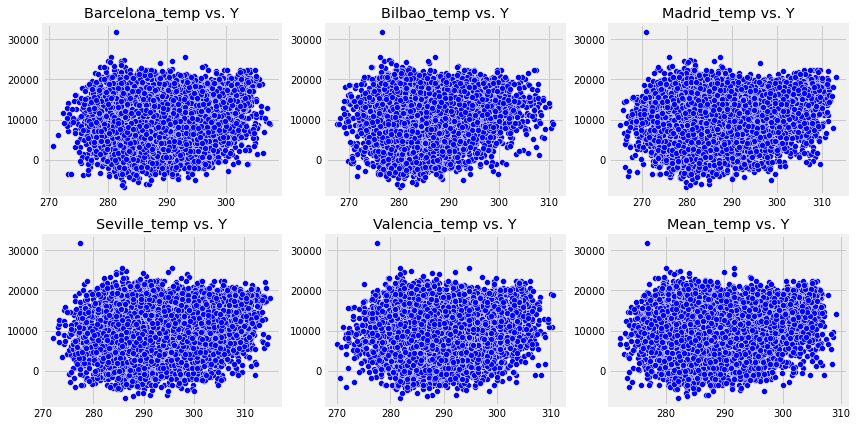

In [21]:
x_temp = x_0.filter(regex="temp$", axis=1)
x_temp["Mean_temp"] = x_temp.mean(axis=1)
x_temp.head(2)
x_temp.describe()
scatter_plot(x_temp, y_0, plotrow=3, plotcolumn=2, figsize=(12,6))

Barcelona_temp_max  Bilbao_temp_max  Madrid_temp_max  Seville_temp_max  \
0          281.013000       269.338615       265.938000        274.254667   
1          280.561667       270.376000       266.386667        274.945000   

   Valencia_temp_max  Mean_temp_max  
0         269.888000     272.086456  
1         271.728333     272.799533

Barcelona_temp_max  Bilbao_temp_max  Madrid_temp_max  Seville_temp_max  \
count         8763.000000      8763.000000      8763.000000       8763.000000   
mean           291.157644       287.966027       289.540309        297.479527   
std              7.273538         7.105590         9.752047          8.875812   
min            272.150000       269.063000       264.983333        272.063000   
25%            285.483333       282.836776       282.150000        291.312750   
50%            290.150000       287.630000       288.116177        297.101667   
75%            296.855000       292.483333       296.816667        304.150000   
max            314.076667       317.966667       314.483333        320.483333   

       Valencia_temp_max  Mean_temp_max  
count        8763.000000    8763.000000  
mean          291.337233     291.496148  
std             7.565692       7.533065  
min           269.888000     272.086456  
25%           285.550167     285.750000  
50%           291.037000     290.816667  
75%           297.248333     297.184000  
max           314.263333     312.608000

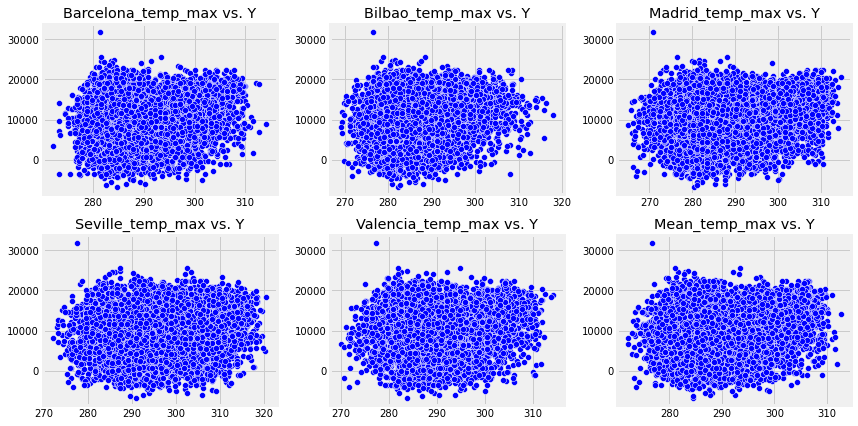

In [22]:
# Investigate temp_max variable

x_temp_max = x_0.filter(regex="max$", axis=1)
x_temp_max["Mean_temp_max"] = x_temp_max.mean(axis=1)
x_temp_max.head(2)
x_temp_max.describe()
scatter_plot(x_temp_max, y_0, plotrow=3, plotcolumn=2, figsize=(12,6))

Barcelona_temp_min  Bilbao_temp_min  Madrid_temp_min  Seville_temp_min  \
0          281.013000       269.338615       265.938000        274.254667   
1          280.561667       270.376000       266.386667        274.945000   

   Valencia_temp_min  Mean_temp_min  
0         269.888000     272.086456  
1         271.728333     272.799533

Barcelona_temp_min  Bilbao_temp_min  Madrid_temp_min  Seville_temp_min  \
count         8763.000000      8763.000000      8763.000000       8763.000000   
mean           288.447422       285.017973       287.202203        291.633356   
std              6.102593         6.705672         9.206237          8.178220   
min            269.483333       264.483333       264.983333        270.150000   
25%            284.150000       280.085167       280.299167        285.816667   
50%            288.150000       284.816667       286.083333        290.816667   
75%            292.966667       289.816667       293.884500        297.150000   
max            304.816667       309.816667       310.383333        314.816667   

       Valencia_temp_min  Mean_temp_min  
count        8763.000000    8763.000000  
mean          289.867648     288.433720  
std             6.907402       6.986035  
min           269.888000     271.083333  
25%           284.783333     283.126077  
50%           289.550000     287.800733  
75%           294.820000     293.624000  
max           310.272000     307.350000

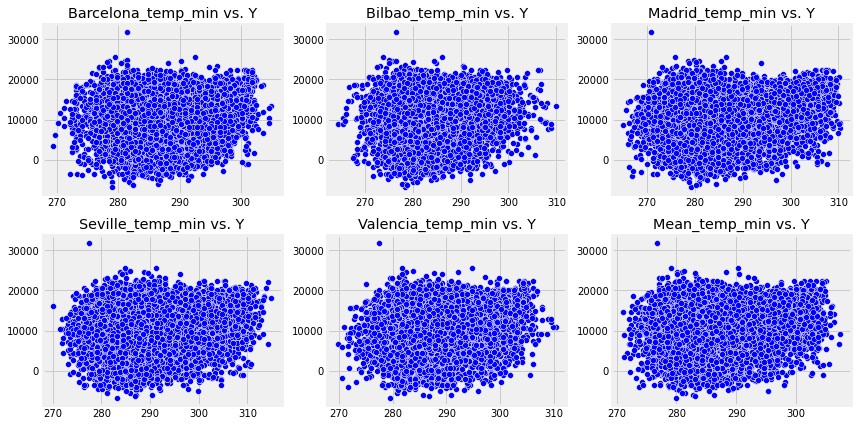

In [23]:
# Investigate temp_min variable

x_temp_min = x_0.filter(regex="min$", axis=1)
x_temp_min["Mean_temp_min"] = x_temp_min.mean(axis=1)
x_temp_min.head(2)
x_temp_min.describe()
scatter_plot(x_temp_min, y_0, plotrow=3, plotcolumn=2, figsize=(12,6))

Mean_temp  Mean_temp_max  Mean_temp_min  load_shortfall_3h
0  272.086456     272.086456     272.086456        6715.666667
1  272.799533     272.799533     272.799533        4171.666667

Correlation_Coefficient  P_Value
Mean_temp                     0.184345      0.0
Mean_temp_max                 0.168071      0.0
Mean_temp_min                 0.194317      0.0

['Mean_temp',
 'Mean_temp',
 'Mean_temp_max',
 'Mean_temp_max',
 'Mean_temp_min',
 'Mean_temp_min']


High correlation observed for all variables; using all of these variables will result in working with redundant information
Choose one better correlated (and lower p-value) to the y_0: 'Mean_temp_min'



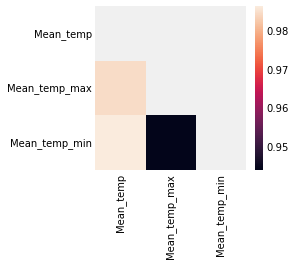

In [24]:
# Investigate mean of all temp variables

x_temp_mean = x_temp[["Mean_temp"]].join(other = [x_temp_max["Mean_temp_max"], x_temp_min["Mean_temp_min"]])
xy_temp_mean = x_temp_mean.join(y_0)
xy_temp_mean.head(2)

# Correlation and p-value of temperature predictor variables and y

p_values(xy_temp_mean, y="load_shortfall_3h", dec_place=6, p_value_threshold=0.1)

# Correlation heatmap of temperature predictor variables

temp_predictor_corr = x_temp_mean.corr()
corr_heatmap(temp_predictor_corr, diag_len=3, corr_threshold=0.9)

print('', end="\n")
print("High correlation observed for all variables; using all of these variables will result in working with redundant information")
print("Choose one better correlated (and lower p-value) to the y_0: 'Mean_temp_min'")
print('', end="\n")

time  Mean_temp_min
0 2015-01-01 03:00:00     272.086456
1 2015-01-01 06:00:00     272.799533

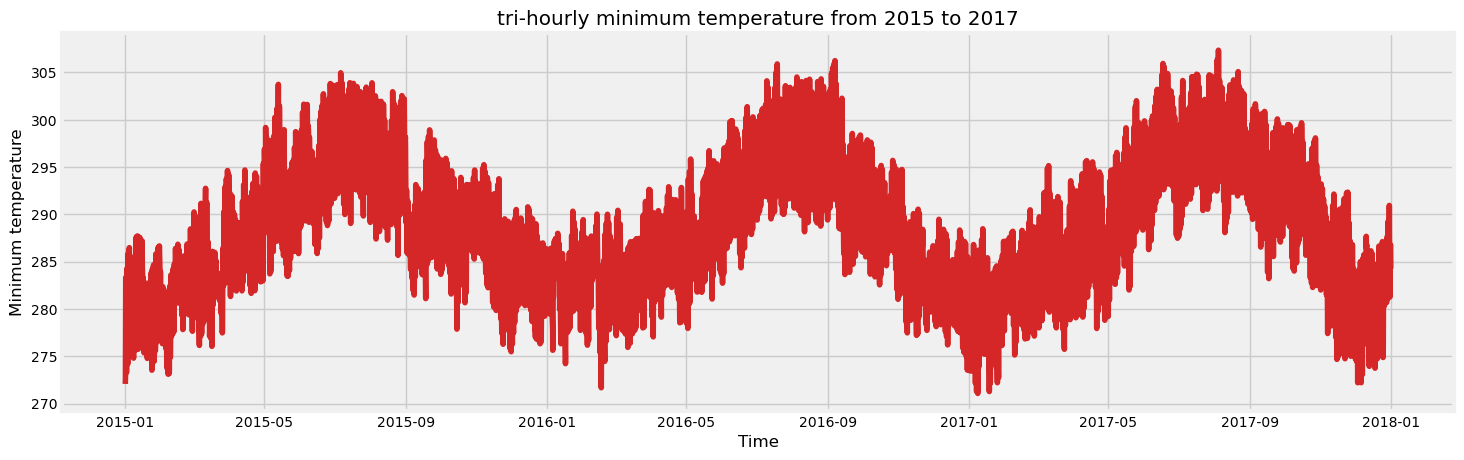

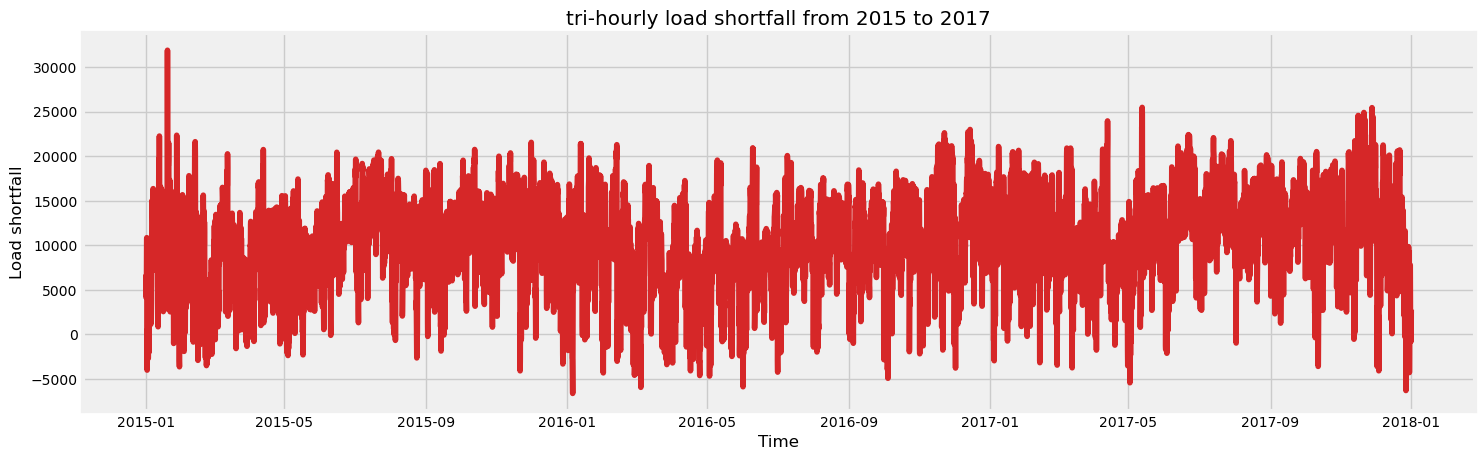

Seasonality observed for temperature


In [25]:
# Temp_min time series plot compared with y_0

temp_min_ts = df_train_clean[["time"]].join(other=x_temp_min["Mean_temp_min"])
temp_min_ts.head(2)
ts_plot(temp_min_ts, x=temp_min_ts.time, y=temp_min_ts.Mean_temp_min, title='tri-hourly minimum temperature from 2015 to 2017', ylabel="Minimum temperature")
y_0_plot()
print("Seasonality observed for temperature")

#### 3.2.2. Investigate wind speed

Barcelona_wind_speed  Bilbao_wind_speed  Madrid_wind_speed  \
0              6.333333                1.0           0.666667   
1              4.000000                1.0           0.333333   

   Seville_wind_speed  Valencia_wind_speed  Mean_wind_speed  
0            3.333333             0.666667         2.400000  
1            3.333333             1.666667         2.066667

Barcelona_wind_speed  Bilbao_wind_speed  Madrid_wind_speed  \
count           8763.000000        8763.000000        8763.000000   
mean               2.870497           1.850356           2.425729   
std                1.792197           1.695888           1.850371   
min                0.000000           0.000000           0.000000   
25%                1.666667           0.666667           1.000000   
50%                2.666667           1.000000           2.000000   
75%                4.000000           2.666667           3.333333   
max               12.666667          12.666667          13.000000   

       Seville_wind_speed  Valencia_wind_speed  Mean_wind_speed  
count         8763.000000          8763.000000      8763.000000  
mean             2.425045             2.586272         2.431580  
std              1.672895             2.411190         1.305226  
min              0.000000             0.000000         0.333333  
25%              1.000000             1.000000         1.466667  
50%              2.000000             1.666667         2.066667  
75%              3.333333             3.666667         3.066667  
max             11.666667            52.000000        14.933333

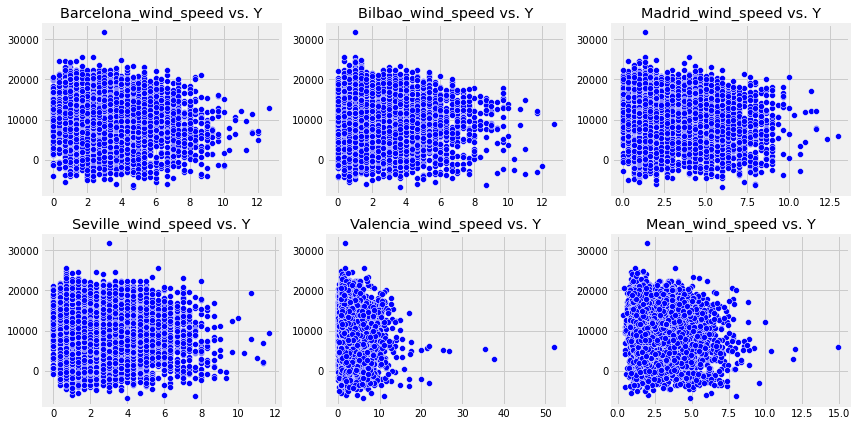

In [26]:
x_wind_speed = x_0.filter(regex="speed$", axis=1)
x_wind_speed["Mean_wind_speed"] = x_wind_speed.mean(axis=1)
x_wind_speed.head(2)
x_wind_speed.describe()
scatter_plot(x_wind_speed, y_0, plotrow=3, plotcolumn=2, figsize=(12,6))

time  Mean_wind_speed
0 2015-01-01 03:00:00         2.400000
1 2015-01-01 06:00:00         2.066667

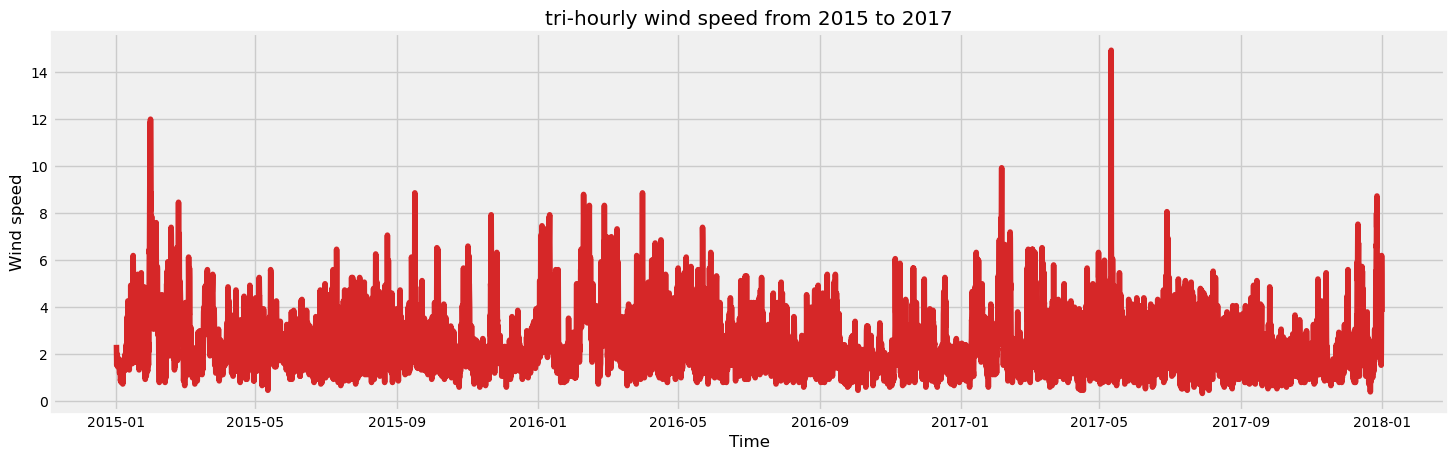

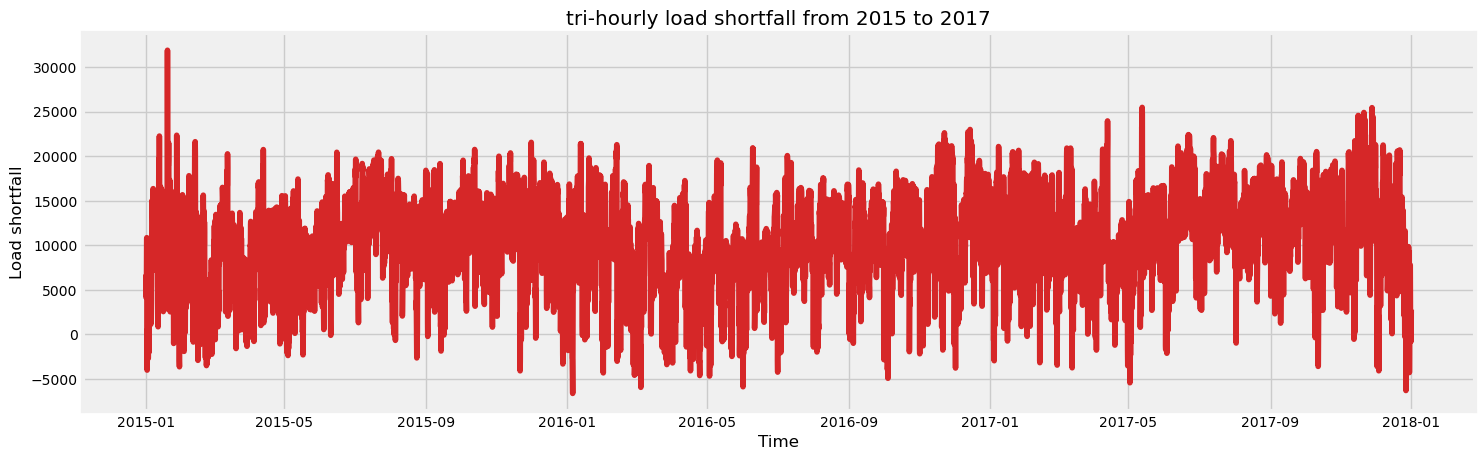

Stationary time series close to white noise (white noise is completely random data with a mean of 0)


In [27]:
# Wind speed time series plot compared with y_0

wind_speed_ts = df_train_clean[["time"]].join(other=x_wind_speed["Mean_wind_speed"])
wind_speed_ts.head(2)
ts_plot(wind_speed_ts, x=wind_speed_ts.time, y=wind_speed_ts.Mean_wind_speed, title='tri-hourly wind speed from 2015 to 2017', ylabel="Wind speed")
y_0_plot()
print("Stationary time series close to white noise (white noise is completely random data with a mean of 0)")

#### 3.2.3. Investigate wind degree

Barcelona_wind_deg  Bilbao_wind_deg  Valencia_wind_deg  Mean_wind_deg
0           42.666667       223.333333                  5      90.333333
1          139.000000       221.000000                 10     123.333333

Barcelona_wind_deg  Bilbao_wind_deg  Valencia_wind_deg  Mean_wind_deg
count         8763.000000      8763.000000        8763.000000    8763.000000
mean           190.544848       158.957511           5.276389     118.259583
std             89.077337       102.056299           2.877642      45.027059
min              0.000000         0.000000           1.000000       1.000000
25%            118.166667        73.333333           3.000000      84.444444
50%            200.000000       147.000000           5.000000     120.333333
75%            260.000000       234.000000           8.000000     151.944444
max            360.000000       359.333333          10.000000     232.000000

Valencia_wind_deg is observerd to consist extreme value range and seem to be a categorical variable



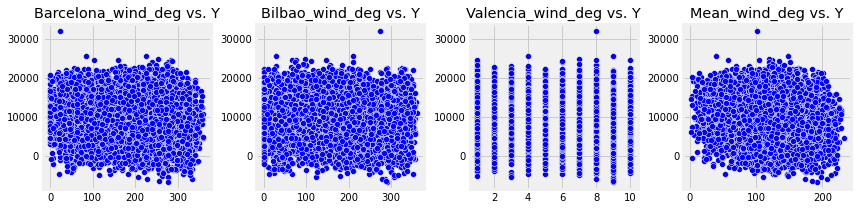

In [28]:
x_wind_deg = x_0.filter(regex="deg$", axis=1)
x_wind_deg["Mean_wind_deg"] = x_wind_deg.mean(axis=1)
x_wind_deg.head(2)
x_wind_deg.describe()
scatter_plot(x_wind_deg, y_0, plotrow=4, plotcolumn=1, figsize=(12,3))

print("Valencia_wind_deg is observerd to consist extreme value range and seem to be a categorical variable")
print('', end="\n")

Barcelona_wind_deg  Bilbao_wind_deg  Mean_wind_deg1
0           42.666667       223.333333           133.0
1          139.000000       221.000000           180.0

Barcelona_wind_deg  Bilbao_wind_deg  Mean_wind_deg1
count         8763.000000      8763.000000     8763.000000
mean           190.544848       158.957511      174.751179
std             89.077337       102.056299       67.210104
min              0.000000         0.000000        0.000000
25%            118.166667        73.333333      124.833333
50%            200.000000       147.000000      177.666667
75%            260.000000       234.000000      225.000000
max            360.000000       359.333333      343.500000

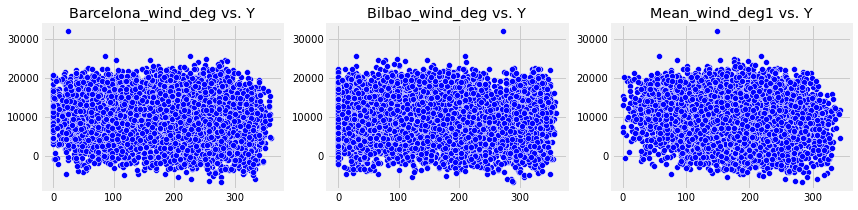

In [29]:
# Adjust for extreme values of wind_deg across cities

x_wind_deg1 = x_0.filter(regex=r'(Barcelona_wind_deg|Bilbao_wind_deg)', axis=1)
x_wind_deg1["Mean_wind_deg1"] = x_wind_deg1.mean(axis=1)
x_wind_deg1.head(2)
x_wind_deg1.describe()
scatter_plot(x_wind_deg1, y_0, plotrow=3, plotcolumn=1, figsize=(12,3))

time  Mean_wind_deg1
0 2015-01-01 03:00:00           133.0
1 2015-01-01 06:00:00           180.0

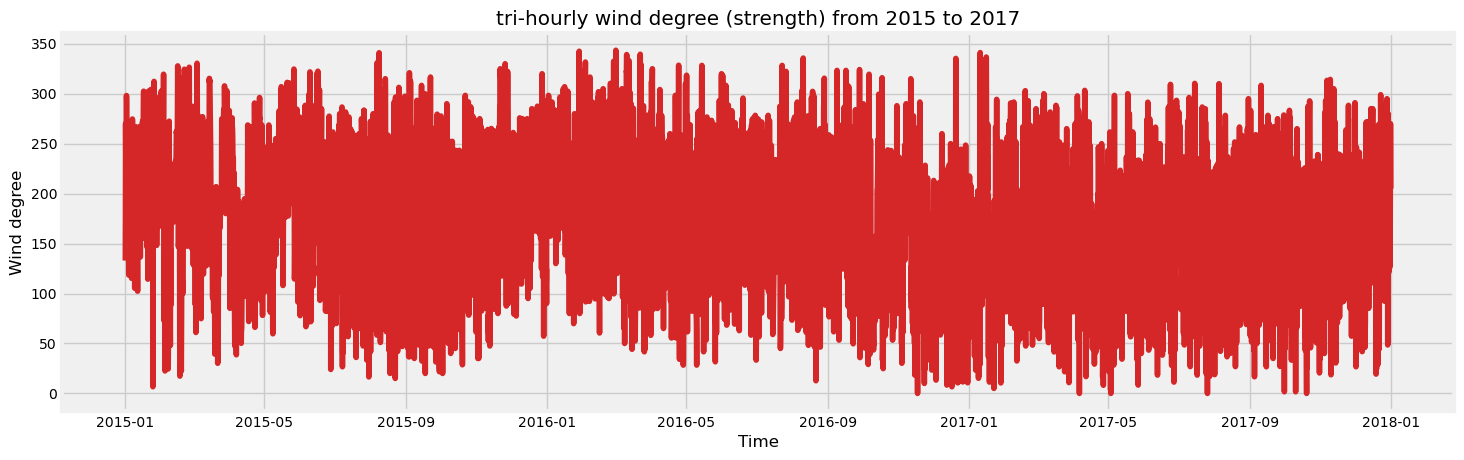

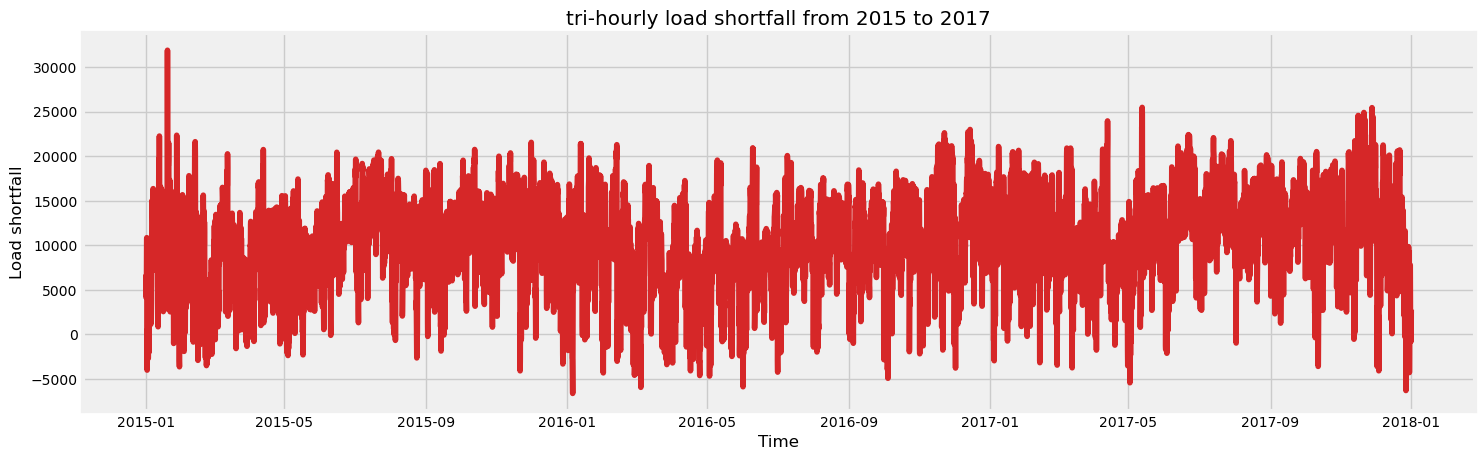

Partial seasonality observed for wind degree (strength)


In [30]:
# wind_deg time series plot compared with y_0

wind_deg_ts = df_train_clean[["time"]].join(other=x_wind_deg1["Mean_wind_deg1"])
wind_deg_ts.head(2)
ts_plot(wind_deg_ts, x=wind_deg_ts.time, y=wind_deg_ts.Mean_wind_deg1, title='tri-hourly wind degree (strength) from 2015 to 2017', ylabel="Wind degree")
y_0_plot()
print("Partial seasonality observed for wind degree (strength)")

#### 3.2.4. Investigate pressure

Barcelona_pressure  Bilbao_pressure  Madrid_pressure  Seville_pressure  \
0         1036.333333      1035.000000       971.333333                25   
1         1037.333333      1035.666667       972.666667                25   

   Valencia_pressure  Mean_pressure  
0        1002.666667     814.066667  
1        1004.333333     815.000000

Barcelona_pressure  Bilbao_pressure  Madrid_pressure  Seville_pressure  \
count        8.763000e+03      8763.000000      8763.000000       8763.000000   
mean         1.377965e+03      1017.739549      1010.316920         13.507246   
std          1.407314e+04        10.046124        22.198555          7.237267   
min          6.706667e+02       971.333333       927.666667          1.000000   
25%          1.014000e+03      1013.000000      1012.333333          7.000000   
50%          1.018000e+03      1019.000000      1017.333333         14.000000   
75%          1.022000e+03      1024.000000      1022.000000         20.000000   
max          1.001411e+06      1042.000000      1038.000000         25.000000   

       Valencia_pressure  Mean_pressure  
count        8763.000000    8763.000000  
mean         1013.455228     886.596710  
std             8.684485    2814.214991  
min           972.666667     735.533333  
25%          1012.666667     811.200000  
50%          1017.000000     815.666667  
75%          1018.000000     819.733333  
max          1021.666667  200874.666667

Barcelona_pressure contributed heavily to the mean across cities due to its extreme value range
Seville_pressure is also observerd to consist extreme value range and seem to be a categorical variable



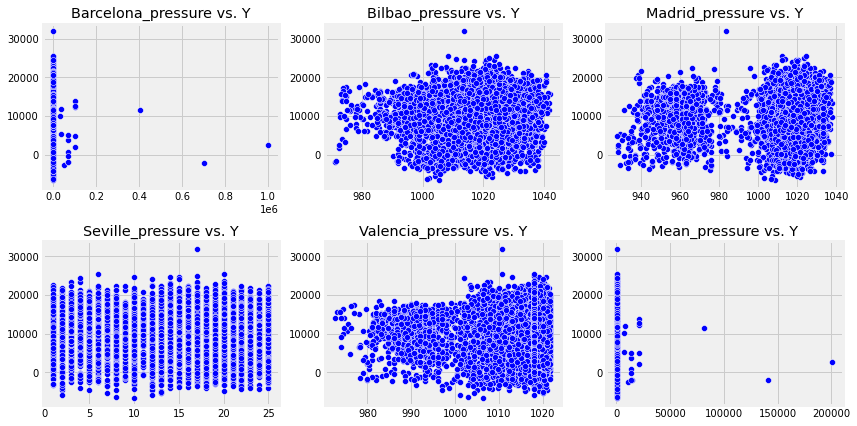

In [31]:
x_pressure = x_0.filter(regex="pressure$", axis=1)
x_pressure["Mean_pressure"] = x_pressure.mean(axis=1)
x_pressure.head(2)
x_pressure.describe()
scatter_plot(x_pressure, y_0, plotrow=3, plotcolumn=2, figsize=(12,6))

print("Barcelona_pressure contributed heavily to the mean across cities due to its extreme value range")
print("Seville_pressure is also observerd to consist extreme value range and seem to be a categorical variable")
print('', end="\n")

Bilbao_pressure  Madrid_pressure  Valencia_pressure  Mean_pressure1
0      1035.000000       971.333333        1002.666667     1003.000000
1      1035.666667       972.666667        1004.333333     1004.222222

Bilbao_pressure  Madrid_pressure  Valencia_pressure  Mean_pressure1
count      8763.000000      8763.000000        8763.000000     8763.000000
mean       1017.739549      1010.316920        1013.455228     1013.837232
std          10.046124        22.198555           8.684485       11.784554
min         971.333333       927.666667         972.666667      962.888889
25%        1013.000000      1012.333333        1012.666667     1011.611111
50%        1019.000000      1017.333333        1017.000000     1017.111111
75%        1024.000000      1022.000000        1018.000000     1021.111111
max        1042.000000      1038.000000        1021.666667     1032.000000

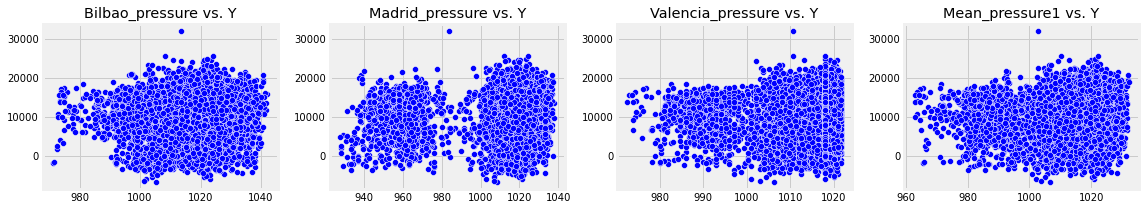

In [32]:
# Adjust for extreme values of pressure across cities

x_pressure1 = x_0.filter(regex=r'(Bilbao_pressure|Madrid_pressure|Valencia_pressure)', axis=1)
x_pressure1["Mean_pressure1"] = x_pressure1.mean(axis=1)
x_pressure1.head(2)
x_pressure1.describe()
scatter_plot(x_pressure1, y_0, plotrow=4, plotcolumn=1, figsize=(16,3))

time  Mean_pressure1
0 2015-01-01 03:00:00     1003.000000
1 2015-01-01 06:00:00     1004.222222

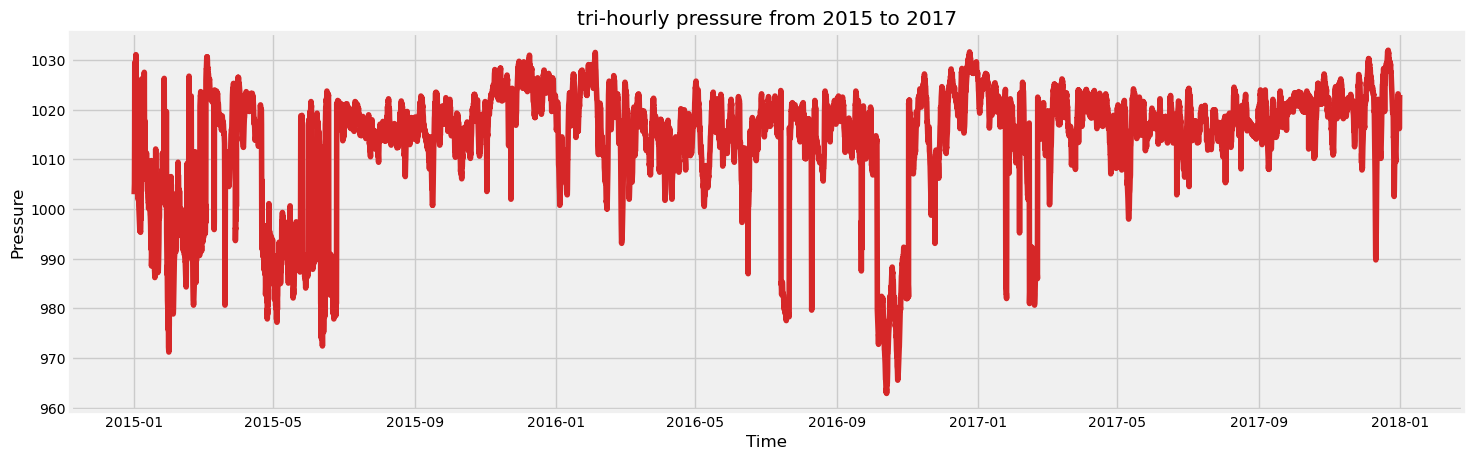

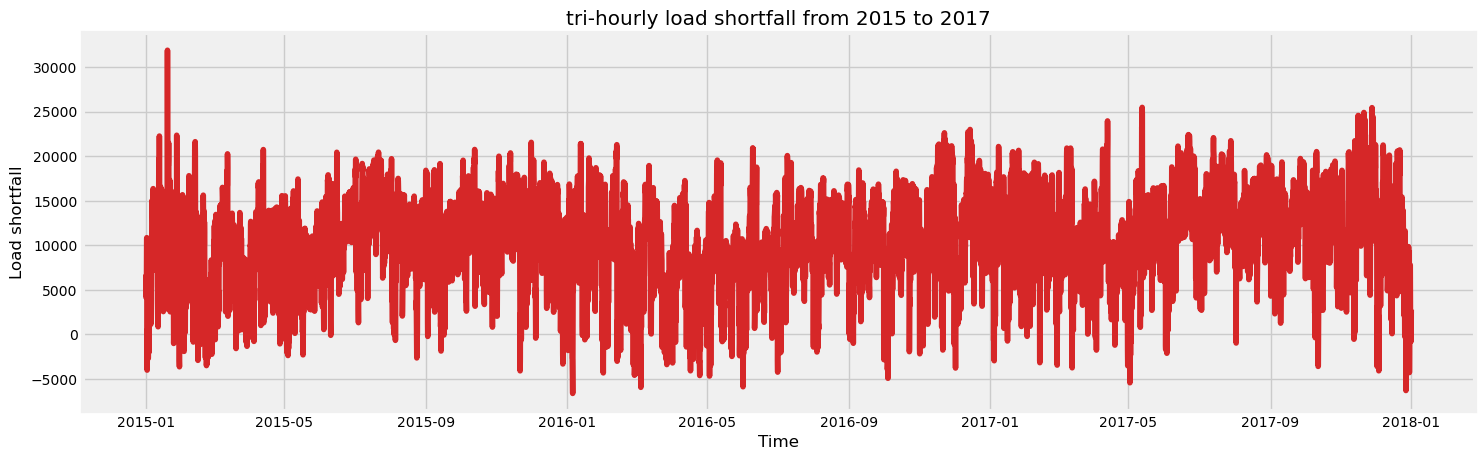

Stationary time series with slightly variable variance


In [33]:
# Pressure time series plot compared with y_0

pressure_ts = df_train_clean[["time"]].join(other=x_pressure1["Mean_pressure1"])
pressure_ts.head(2)
ts_plot(pressure_ts, x=pressure_ts.time, y=pressure_ts.Mean_pressure1, title='tri-hourly pressure from 2015 to 2017', ylabel="Pressure")
y_0_plot()
print("Stationary time series with slightly variable variance")

#### 3.2.5. Investigate rain amount

Barcelona_rain_1h  Barcelona_rain_3h  Bilbao_rain_1h  Madrid_rain_1h  \
0                0.0                0.0             0.0             0.0   
1                0.0                0.0             0.0             0.0   

   Seville_rain_1h  Seville_rain_3h  Mean_rain  
0              0.0              0.0        0.0  
1              0.0              0.0        0.0

Barcelona_rain_1h  Barcelona_rain_3h  Bilbao_rain_1h  Madrid_rain_1h  \
count        8763.000000        8763.000000     8763.000000     8763.000000   
mean            0.128906           0.000439        0.135753        0.037818   
std             0.634730           0.003994        0.374901        0.152639   
min             0.000000           0.000000        0.000000        0.000000   
25%             0.000000           0.000000        0.000000        0.000000   
50%             0.000000           0.000000        0.000000        0.000000   
75%             0.000000           0.000000        0.100000        0.000000   
max            12.000000           0.093000        3.000000        3.000000   

       Seville_rain_1h  Seville_rain_3h    Mean_rain  
count      8763.000000      8763.000000  8763.000000  
mean          0.039439         0.000243     0.057099  
std           0.175857         0.003660     0.139330  
min           0.000000         0.000000     0.000000  
25%           0.000000         0.000000     0.000000  
50%           0.000000         0.000000     0.000000  
75%           0.000000         0.000000     0.050000  
max           3.000000         0.093333     2.133333

Due to the fact that our time series data span 3 hours interval, only rain variable in the same interval will be consedered



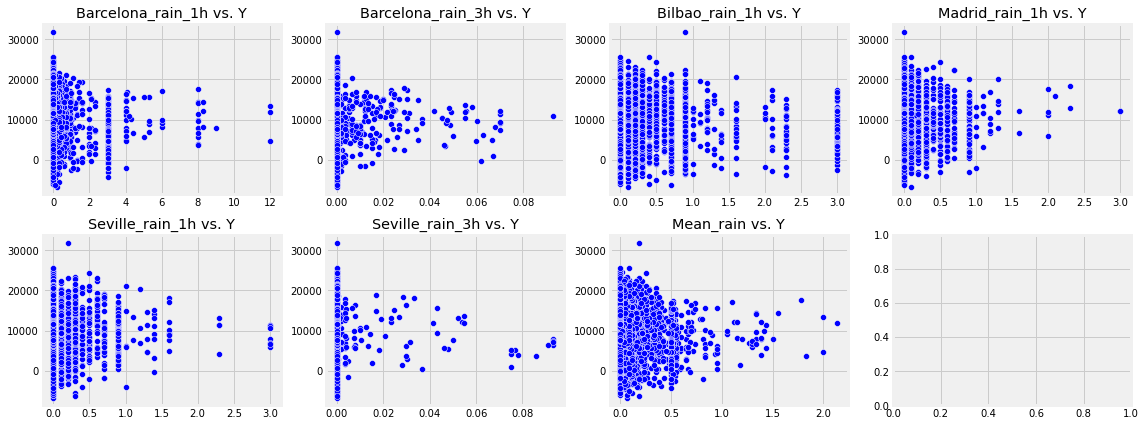

In [34]:
x_rain = x_0.filter(regex="rain", axis=1)
x_rain["Mean_rain"] = x_rain.mean(axis=1)
x_rain.head(2)
x_rain.describe()
scatter_plot(x_rain, y_0, plotrow=4, plotcolumn=2, figsize=(16,6))
print("Due to the fact that our time series data span 3 hours interval, only rain variable in the same interval will be consedered")
print('', end="\n")

Barcelona_rain_3h  Seville_rain_3h  Mean_rain_3h
0                0.0              0.0           0.0
1                0.0              0.0           0.0

Barcelona_rain_3h  Seville_rain_3h  Mean_rain_3h
count        8763.000000      8763.000000   8763.000000
mean            0.000439         0.000243      0.000341
std             0.003994         0.003660      0.002899
min             0.000000         0.000000      0.000000
25%             0.000000         0.000000      0.000000
50%             0.000000         0.000000      0.000000
75%             0.000000         0.000000      0.000000
max             0.093000         0.093333      0.055000

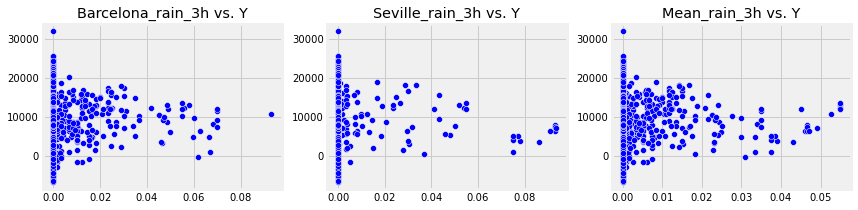

In [35]:
# Adjust for confromity with data time interval

x_rain1 = x_0.filter(regex="rain_3h", axis=1)
x_rain1["Mean_rain_3h"] = x_rain1.mean(axis=1)
x_rain1.head(2)
x_rain1.describe()
scatter_plot(x_rain1, y_0, plotrow=3, plotcolumn=1, figsize=(12,3))

time  Mean_rain_3h
0 2015-01-01 03:00:00           0.0
1 2015-01-01 06:00:00           0.0

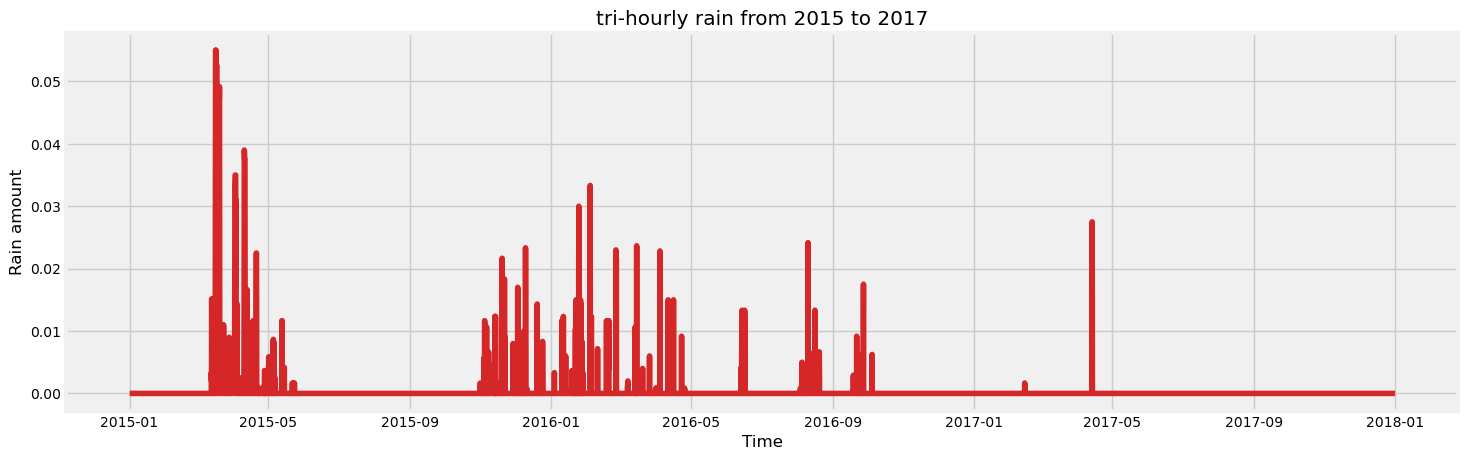

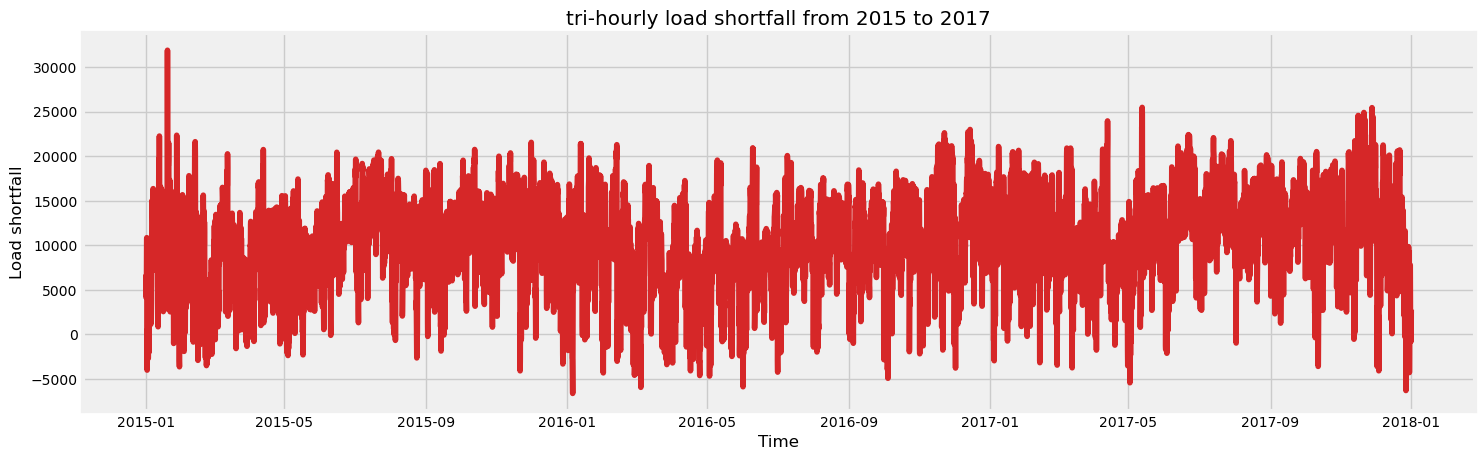

Rain amount observed as white noise (white noise is completely random data with a mean of 0)


In [36]:
# Rain_3h time series plot compared with y_0

rain_3h_ts = df_train_clean[["time"]].join(other=x_rain1["Mean_rain_3h"])
rain_3h_ts.head(2)
ts_plot(rain_3h_ts, x=rain_3h_ts.time, y=rain_3h_ts.Mean_rain_3h, title='tri-hourly rain from 2015 to 2017', ylabel="Rain amount")
y_0_plot()
print("Rain amount observed as white noise (white noise is completely random data with a mean of 0)")

#### 3.2.6. Investigate humidity

Madrid_humidity  Seville_humidity  Valencia_humidity  Mean_humidity
0        64.000000         74.333333          75.666667      71.333333
1        64.666667         78.333333          71.000000      71.333333

Madrid_humidity  Seville_humidity  Valencia_humidity  Mean_humidity
count      8763.000000       8763.000000        8763.000000    8763.000000
mean         57.414717         62.658793          65.247727      61.773746
std          24.335396         22.621226          19.262322      18.604807
min           6.333333          8.333333          10.333333      15.444444
25%          36.333333         44.333333          51.333333      46.777778
50%          58.000000         65.666667          67.000000      62.888889
75%          78.666667         82.000000          81.333333      76.888889
max         100.000000        100.000000         100.000000      99.888889

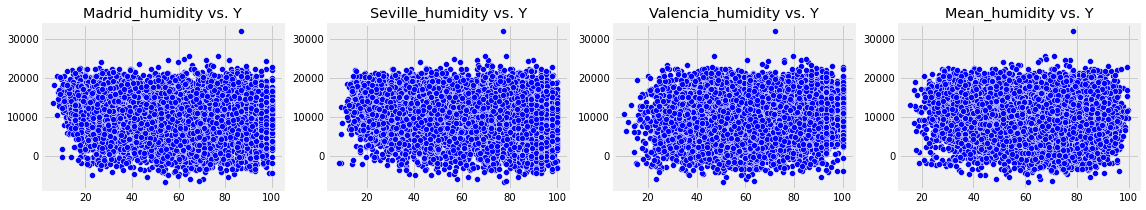

In [37]:
x_humidity = x_0.filter(regex="humidity", axis=1)
x_humidity["Mean_humidity"] = x_humidity.mean(axis=1)
x_humidity.head(2)
x_humidity.describe()
scatter_plot(x_humidity, y_0, plotrow=4, plotcolumn=1, figsize=(16,3))

time  Mean_humidity
0 2015-01-01 03:00:00      71.333333
1 2015-01-01 06:00:00      71.333333

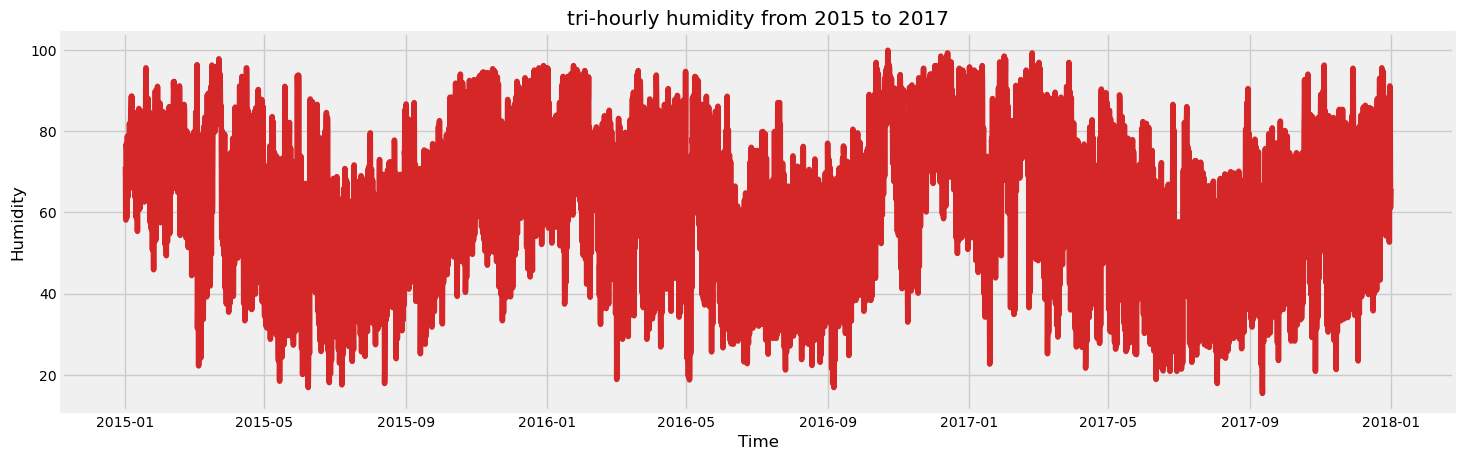

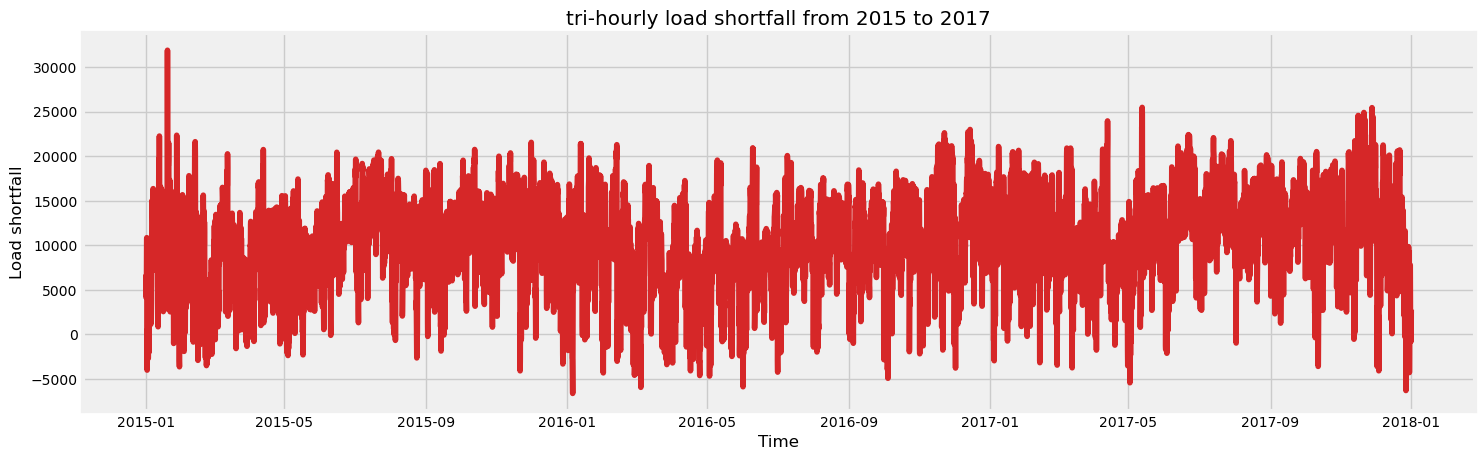

Seasonality observed for humidity


In [38]:
# Humidity time series plot compared with y_0

humidity_ts = df_train_clean[["time"]].join(other=x_humidity["Mean_humidity"])
humidity_ts.head(2)
ts_plot(humidity_ts, x=humidity_ts.time, y=humidity_ts.Mean_humidity, title='tri-hourly humidity from 2015 to 2017', ylabel="Humidity")
y_0_plot()
print("Seasonality observed for humidity")

#### 3.2.7. Investigate level of cloud coverage

Bilbao_clouds_all  Madrid_clouds_all  Seville_clouds_all  Mean_clouds_all
0                0.0                0.0                 0.0              0.0
1                0.0                0.0                 0.0              0.0

Bilbao_clouds_all  Madrid_clouds_all  Seville_clouds_all  \
count        8763.000000        8763.000000         8763.000000   
mean           43.469132          19.473392           13.714748   
std            32.551044          28.053660           24.272482   
min             0.000000           0.000000            0.000000   
25%            10.000000           0.000000            0.000000   
50%            45.000000           0.000000            0.000000   
75%            75.000000          33.333333           20.000000   
max           100.000000         100.000000           97.333333   

       Mean_clouds_all  
count      8763.000000  
mean         25.552424  
std          19.614077  
min           0.000000  
25%           8.888889  
50%          25.000000  
75%          35.888889  
max          92.000000

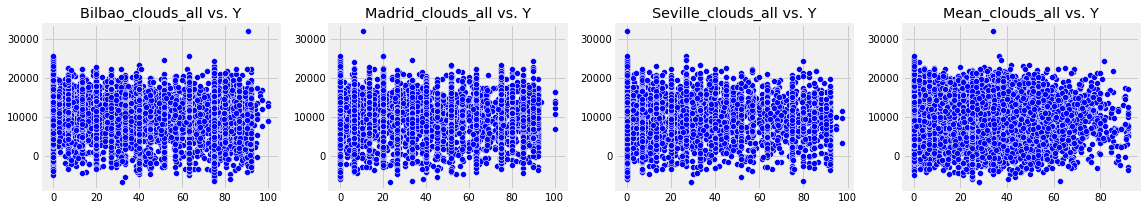

In [39]:
x_clouds_all = x_0.filter(regex="clouds", axis=1)
x_clouds_all["Mean_clouds_all"] = x_clouds_all.mean(axis=1)
x_clouds_all.head(2)
x_clouds_all.describe()
scatter_plot(x_clouds_all, y_0, plotrow=4, plotcolumn=1, figsize=(16,3))

time  Mean_clouds_all
0 2015-01-01 03:00:00              0.0
1 2015-01-01 06:00:00              0.0

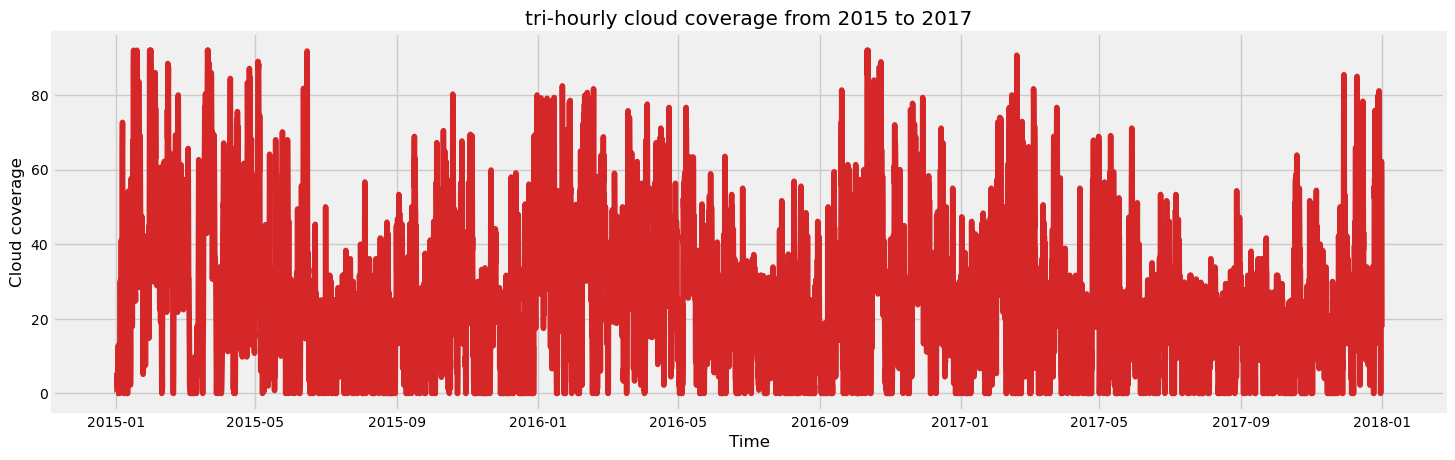

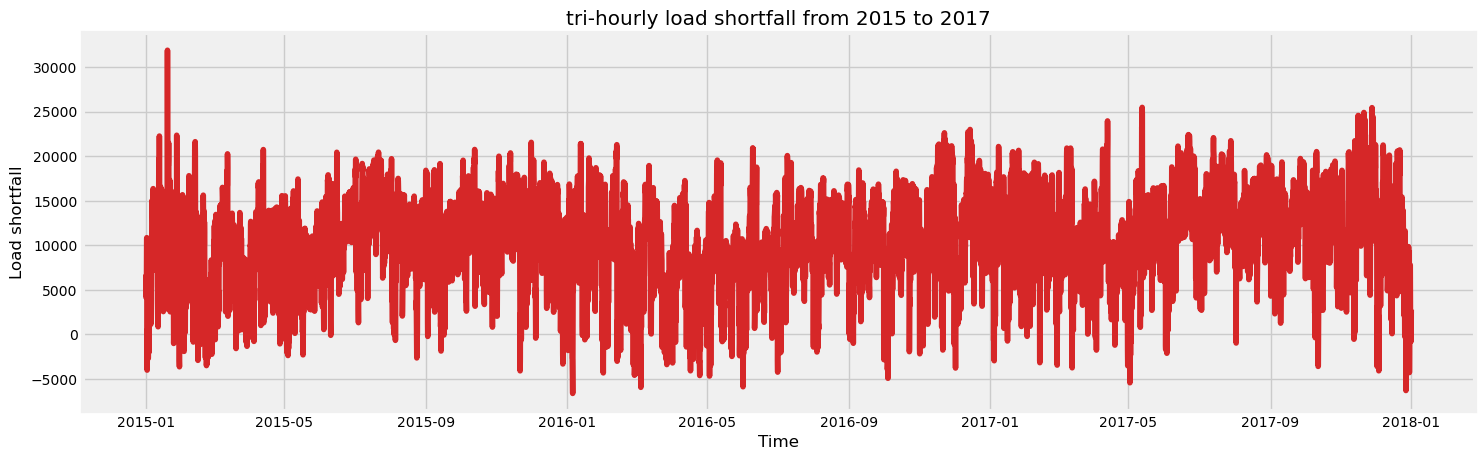

Partial seasonality observed for level of cloud coverage


In [40]:
# Rain_3h time series plot compared with y_0

clouds_all_ts = df_train_clean[["time"]].join(other=x_clouds_all["Mean_clouds_all"])
clouds_all_ts.head(2)
ts_plot(clouds_all_ts, x=clouds_all_ts.time, y=clouds_all_ts.Mean_clouds_all, title='tri-hourly cloud coverage from 2015 to 2017', ylabel="Cloud coverage")
y_0_plot()
print("Partial seasonality observed for level of cloud coverage")

#### 3.2.8. Investigate snow amount

Bilbao_snow_3h  Valencia_snow_3h  Mean_snow_3h
0             0.0               0.0           0.0
1             0.0               0.0           0.0

Bilbao_snow_3h  Valencia_snow_3h  Mean_snow_3h
count     8763.000000       8763.000000   8763.000000
mean         0.031912          0.000205      0.016059
std          0.557264          0.011866      0.281005
min          0.000000          0.000000      0.000000
25%          0.000000          0.000000      0.000000
50%          0.000000          0.000000      0.000000
75%          0.000000          0.000000      0.000000
max         21.300000          0.791667     10.650000

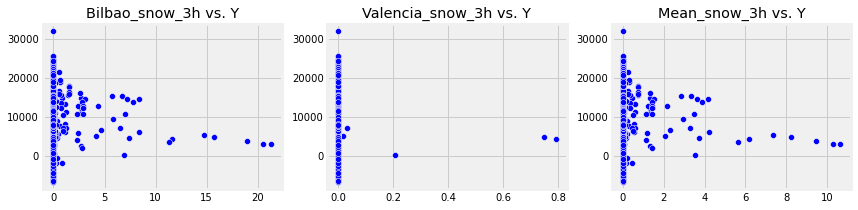

In [41]:
x_snow_3h = x_0.filter(regex="snow", axis=1)
x_snow_3h["Mean_snow_3h"] = x_snow_3h.mean(axis=1)
x_snow_3h.head(2)
x_snow_3h.describe()
scatter_plot(x_snow_3h, y_0, plotrow=3, plotcolumn=1, figsize=(12,3))

time  Mean_snow_3h
0 2015-01-01 03:00:00           0.0
1 2015-01-01 06:00:00           0.0

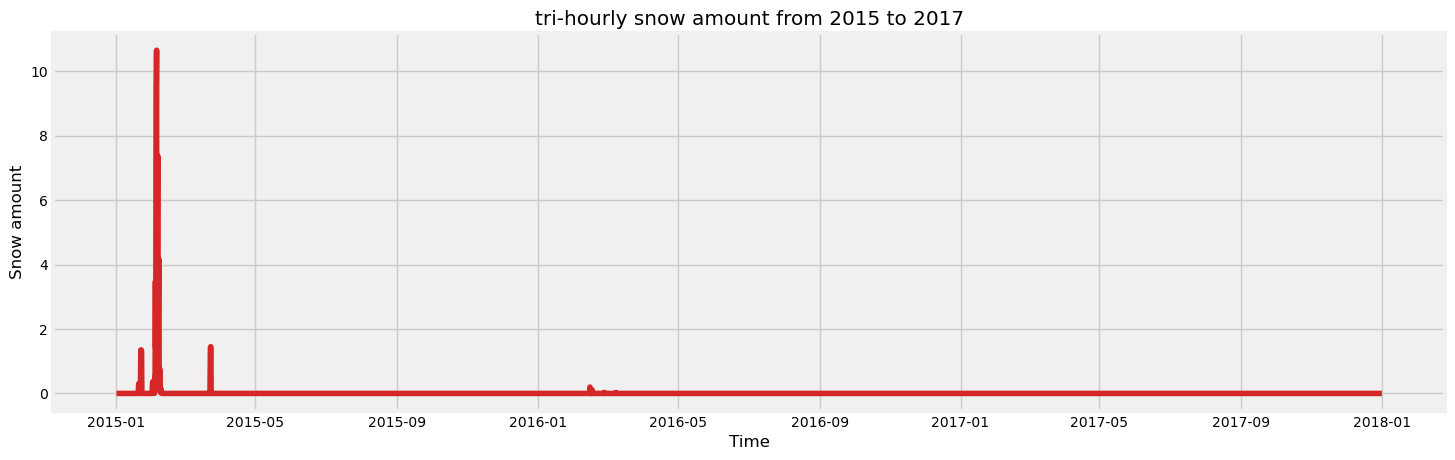

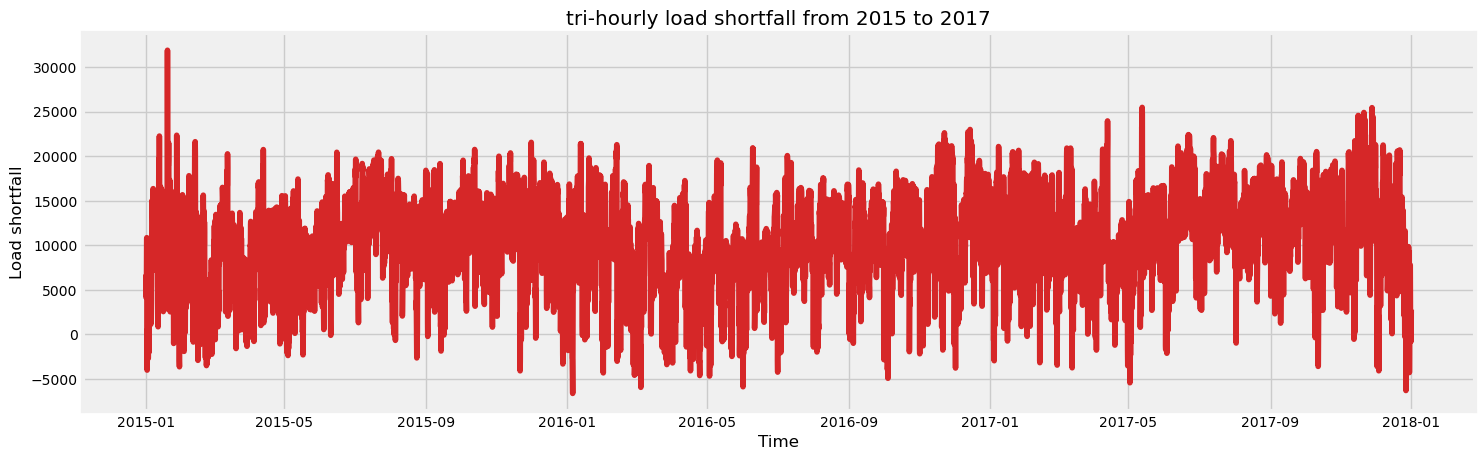

Snow amount observed as white noise (white noise is completely random data with a mean of 0)


In [42]:
# Snow_3h time series plot compared with y_0

snow_3h_ts = df_train_clean[["time"]].join(other=x_snow_3h["Mean_snow_3h"])
snow_3h_ts.head(2)
ts_plot(snow_3h_ts, x=snow_3h_ts.time, y=snow_3h_ts.Mean_snow_3h, title='tri-hourly snow amount from 2015 to 2017', ylabel="Snow amount")
y_0_plot()
print("Snow amount observed as white noise (white noise is completely random data with a mean of 0)")

#### 3.2.9. Investigate weather id (weather condition)

Barcelona_weather_id  Bilbao_weather_id  Madrid_weather_id  \
0                 800.0              800.0              800.0   
1                 800.0              800.0              800.0   

   Seville_weather_id  Mean_weather_id  
0               800.0            800.0  
1               800.0            800.0

Barcelona_weather_id  Bilbao_weather_id  Madrid_weather_id  \
count           8763.000000        8763.000000        8763.000000   
mean             765.979687         724.722362         773.527594   
std               88.142235         115.846537          77.313315   
min              200.666667         207.333333         211.000000   
25%              800.000000         700.333333         800.000000   
50%              800.333333         800.000000         800.000000   
75%              801.000000         801.666667         800.666667   
max              804.000000         804.000000         804.000000   

       Seville_weather_id  Mean_weather_id  
count         8763.000000      8763.000000  
mean           774.658818       759.722115  
std             71.940009        54.079580  
min            200.000000       495.666667  
25%            800.000000       726.250000  
50%            800.000000       781.916667  
75%            800.000000       800.458333  
max            804.000000       803.666667

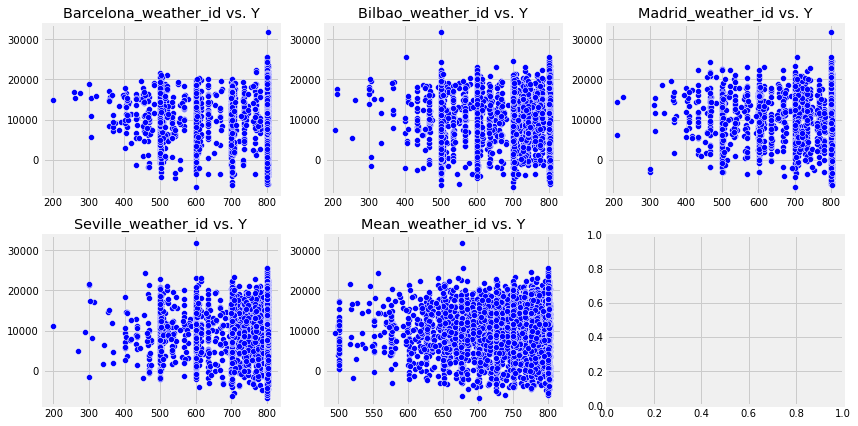

In [43]:
x_weather_id = x_0.filter(regex="weather", axis=1)
x_weather_id["Mean_weather_id"] = x_weather_id.mean(axis=1)
x_weather_id.head(2)
x_weather_id.describe()
scatter_plot(x_weather_id, y_0, plotrow=3, plotcolumn=2, figsize=(12,6))

time  Mean_weather_id
0 2015-01-01 03:00:00            800.0
1 2015-01-01 06:00:00            800.0

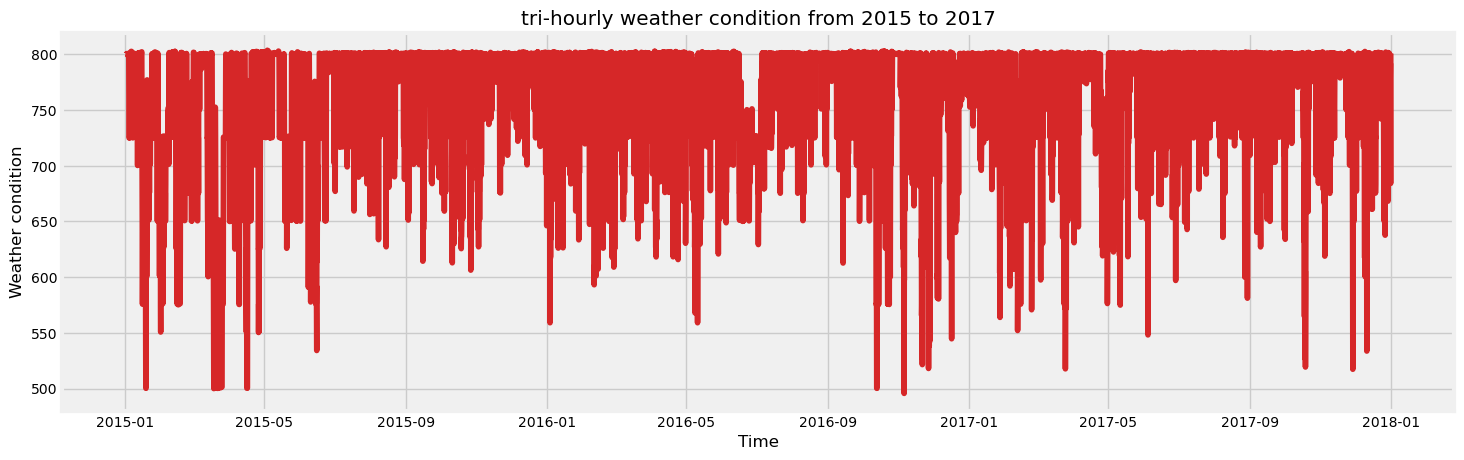

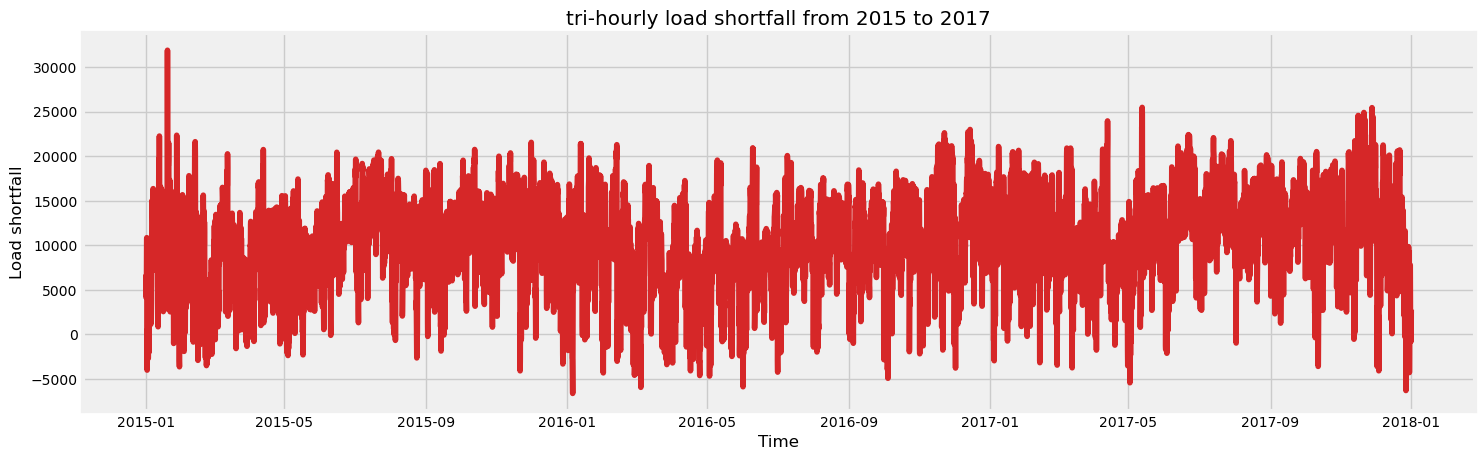

Stationary time series with non-constant variance


In [44]:
# Snow_3h time series plot compared with y_0

weather_id_ts = df_train_clean[["time"]].join(other=x_weather_id["Mean_weather_id"])
weather_id_ts.head(2)
ts_plot(weather_id_ts, x=weather_id_ts.time, y=weather_id_ts.Mean_weather_id, title='tri-hourly weather condition from 2015 to 2017', ylabel="Weather condition")
y_0_plot()
print("Stationary time series with non-constant variance")

#### 3.2.9. Investigate time

In [45]:
# Create hour of year; counting hours at intervals of 3 all year round

x_time = x_0.filter(regex="time", axis=1)
x_time["time_hourofyear"] = x_time["time_hour"] + ((x_time["time_dayofyear"] - 1) * 24)
x_time.tail(2)
x_time.describe()
x_time.loc[x_time["time_hourofyear"] == 0]
print("Hour of year vital to predict 'tri-hourly load shortfall' yearly")

time_day  time_dayofyear  time_hour  time_month  time_weekday  \
8761        31             365         18          12             6   
8762        31             365         21          12             6   

      time_weeknumber  time_year  time_hourofyear  
8761               52       2017             8754  
8762               52       2017             8757

time_day  time_dayofyear    time_hour   time_month  time_weekday  \
count  8763.000000     8763.000000  8763.000000  8763.000000   8763.000000   
mean     15.740157      183.262924    10.498459     6.524820      3.005478   
std       8.798664      105.421802     6.874031     3.447976      1.999193   
min       1.000000        1.000000     0.000000     1.000000      0.000000   
25%       8.000000       92.000000     4.500000     4.000000      1.000000   
50%      16.000000      183.000000     9.000000     7.000000      3.000000   
75%      23.000000      275.000000    15.000000    10.000000      5.000000   
max      31.000000      366.000000    21.000000    12.000000      6.000000   

       time_weeknumber    time_year  time_hourofyear  
count      8763.000000  8763.000000      8763.000000  
mean         26.752596  2016.000571      4384.808627  
std          15.063472     0.816054      2530.134785  
min           1.000000  2015.000000         0.000000  
25%          14.000000  2015.000000      2194.500000  
50%          27.000000  2016.000000      4386.000000  
75%          40.000000  2017.000000      6576.000000  
max          53.000000  2017.000000      8781.000000

time_day  time_dayofyear  time_hour  time_month  time_weekday  \
2915         1               1          0           1             4   
5843         1               1          0           1             6   

      time_weeknumber  time_year  time_hourofyear  
2915               53       2016                0  
5843               52       2017                0

Hour of year vital to predict 'tri-hourly load shortfall' yearly


### 3.3. Variable Selection based on observed Correlation and Significance

In [46]:
# Mean of varibles across cities

print("Mean of varibles across cities")
x_select_cs = x_time[["time_hourofyear"]].join(other = [x_temp["Mean_temp"], x_temp_max["Mean_temp_max"], x_temp_min["Mean_temp_min"],
                                                        x_wind_speed["Mean_wind_speed"], x_wind_deg["Mean_wind_deg"], x_pressure["Mean_pressure"],
                                                        x_rain["Mean_rain"], x_humidity["Mean_humidity"], x_clouds_all["Mean_clouds_all"],
                                                        x_snow_3h["Mean_snow_3h"], x_weather_id["Mean_weather_id"]])
x_select_cs.head(2)
x_select_cs.shape
x_select_cs.describe().T

# Mean of varibles (as adjusted during investigation) across cities

print('', end="\n\n")
print("Varibles (as adjusted during investigation)")
x_select_cs1 = x_time[["time_hourofyear"]].join(other = [x_temp_min["Mean_temp_min"], x_wind_speed["Mean_wind_speed"], x_wind_deg1["Mean_wind_deg1"],
                                                         x_pressure1["Mean_pressure1"], x_rain1["Mean_rain_3h"], x_humidity["Mean_humidity"],
                                                         x_clouds_all["Mean_clouds_all"], x_snow_3h["Mean_snow_3h"], x_weather_id["Mean_weather_id"]])
x_select_cs1.head(2)
x_select_cs1.shape
x_select_cs1.describe().T

Mean of varibles across cities


time_hourofyear   Mean_temp  Mean_temp_max  Mean_temp_min  Mean_wind_speed  \
0                3  272.086456     272.086456     272.086456         2.400000   
1                6  272.799533     272.799533     272.799533         2.066667   

   Mean_wind_deg  Mean_pressure  Mean_rain  Mean_humidity  Mean_clouds_all  \
0      90.333333     814.066667        0.0      71.333333              0.0   
1     123.333333     815.000000        0.0      71.333333              0.0   

   Mean_snow_3h  Mean_weather_id  
0           0.0            800.0  
1           0.0            800.0

(8763, 12)

count         mean          std         min          25%  \
time_hourofyear  8763.0  4384.808627  2530.134785    0.000000  2194.500000   
Mean_temp        8763.0   289.853776     7.200703  272.086456   284.290767   
Mean_temp_max    8763.0   291.496148     7.533065  272.086456   285.750000   
Mean_temp_min    8763.0   288.433720     6.986035  271.083333   283.126077   
Mean_wind_speed  8763.0     2.431580     1.305226    0.333333     1.466667   
Mean_wind_deg    8763.0   118.259583    45.027059    1.000000    84.444444   
Mean_pressure    8763.0   886.596710  2814.214991  735.533333   811.200000   
Mean_rain        8763.0     0.057099     0.139330    0.000000     0.000000   
Mean_humidity    8763.0    61.773746    18.604807   15.444444    46.777778   
Mean_clouds_all  8763.0    25.552424    19.614077    0.000000     8.888889   
Mean_snow_3h     8763.0     0.016059     0.281005    0.000000     0.000000   
Mean_weather_id  8763.0   759.722115    54.079580  495.666667   726.250000   

                         50%          75%            max  
time_hourofyear  4386.000000  6576.000000    8781.000000  
Mean_temp         289.169333   295.258667     309.074000  
Mean_temp_max     290.816667   297.184000     312.608000  
Mean_temp_min     287.800733   293.624000     307.350000  
Mean_wind_speed     2.066667     3.066667      14.933333  
Mean_wind_deg     120.333333   151.944444     232.000000  
Mean_pressure     815.666667   819.733333  200874.666667  
Mean_rain           0.000000     0.050000       2.133333  
Mean_humidity      62.888889    76.888889      99.888889  
Mean_clouds_all    25.000000    35.888889      92.000000  
Mean_snow_3h        0.000000     0.000000      10.650000  
Mean_weather_id   781.916667   800.458333     803.666667



Varibles (as adjusted during investigation)


time_hourofyear  Mean_temp_min  Mean_wind_speed  Mean_wind_deg1  \
0                3     272.086456         2.400000           133.0   
1                6     272.799533         2.066667           180.0   

   Mean_pressure1  Mean_rain_3h  Mean_humidity  Mean_clouds_all  Mean_snow_3h  \
0     1003.000000           0.0      71.333333              0.0           0.0   
1     1004.222222           0.0      71.333333              0.0           0.0   

   Mean_weather_id  
0            800.0  
1            800.0

(8763, 10)

count         mean          std         min          25%  \
time_hourofyear  8763.0  4384.808627  2530.134785    0.000000  2194.500000   
Mean_temp_min    8763.0   288.433720     6.986035  271.083333   283.126077   
Mean_wind_speed  8763.0     2.431580     1.305226    0.333333     1.466667   
Mean_wind_deg1   8763.0   174.751179    67.210104    0.000000   124.833333   
Mean_pressure1   8763.0  1013.837232    11.784554  962.888889  1011.611111   
Mean_rain_3h     8763.0     0.000341     0.002899    0.000000     0.000000   
Mean_humidity    8763.0    61.773746    18.604807   15.444444    46.777778   
Mean_clouds_all  8763.0    25.552424    19.614077    0.000000     8.888889   
Mean_snow_3h     8763.0     0.016059     0.281005    0.000000     0.000000   
Mean_weather_id  8763.0   759.722115    54.079580  495.666667   726.250000   

                         50%          75%          max  
time_hourofyear  4386.000000  6576.000000  8781.000000  
Mean_temp_min     287.800733   293.624000   307.350000  
Mean_wind_speed     2.066667     3.066667    14.933333  
Mean_wind_deg1    177.666667   225.000000   343.500000  
Mean_pressure1   1017.111111  1021.111111  1032.000000  
Mean_rain_3h        0.000000     0.000000     0.055000  
Mean_humidity      62.888889    76.888889    99.888889  
Mean_clouds_all    25.000000    35.888889    92.000000  
Mean_snow_3h        0.000000     0.000000    10.650000  
Mean_weather_id   781.916667   800.458333   803.666667

In [47]:
# Correlation and p-value of x and y

x_select_cs_y = x_select_cs.join(y_0)
p_values(x_select_cs_y, dec_place=6, p_value_threshold=0.01)

x_select_cs1_y = x_select_cs1.join(y_0)
p_values(x_select_cs1_y, dec_place=6, p_value_threshold=0.01)

Correlation_Coefficient   P_Value
time_hourofyear                 0.205906  0.000000
Mean_temp                       0.184345  0.000000
Mean_temp_max                   0.168071  0.000000
Mean_temp_min                   0.194317  0.000000
Mean_wind_speed                -0.157644  0.000000
Mean_wind_deg                  -0.171868  0.000000
Mean_rain                      -0.123256  0.000000
Mean_humidity                  -0.118548  0.000000
Mean_clouds_all                -0.147201  0.000000
Mean_weather_id                 0.135499  0.000000
Mean_pressure                  -0.034176  0.001376
Mean_snow_3h                   -0.031910  0.002813

Correlation_Coefficient   P_Value
time_hourofyear                 0.205906  0.000000
Mean_temp_min                   0.194317  0.000000
Mean_wind_speed                -0.157644  0.000000
Mean_wind_deg1                 -0.168674  0.000000
Mean_pressure1                  0.091472  0.000000
Mean_humidity                  -0.118548  0.000000
Mean_clouds_all                -0.147201  0.000000
Mean_weather_id                 0.135499  0.000000
Mean_rain_3h                   -0.037829  0.000397
Mean_snow_3h                   -0.031910  0.002813

['Mean_temp',
 'Mean_temp',
 'Mean_temp_max',
 'Mean_temp_max',
 'Mean_temp_min',
 'Mean_temp_min']

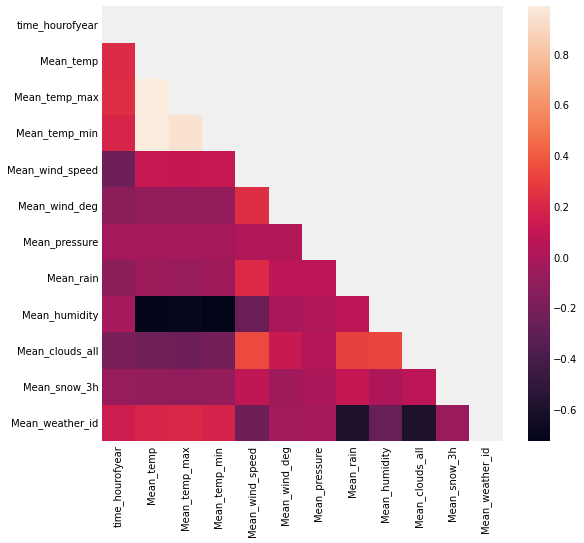

In [48]:
# Show correlation heatmap and list columns with high correlation for x_mean

mean_corrs = x_select_cs.corr()
corr_heatmap(mean_corrs, diag_len=8, corr_threshold=0.9)

[]

correlations between selected variables minimal


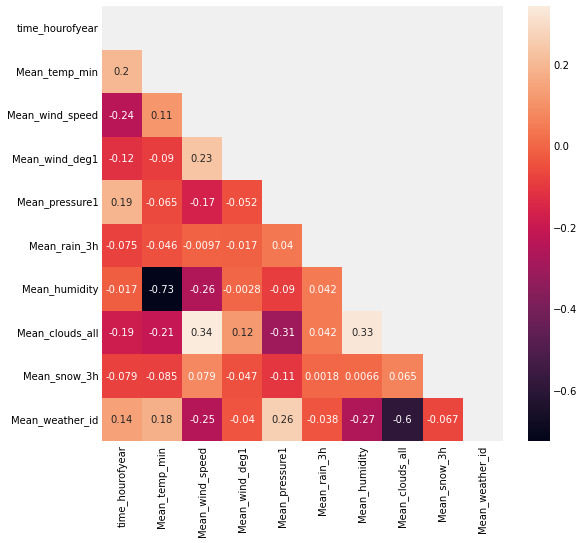

In [49]:
# Show correlation heatmap and list columns with high correlation x_mean1

mean1_corrs = x_select_cs1.corr()
corr_heatmap(mean1_corrs, diag_len=8, corr_threshold=0.8, annot=True)
print("correlations between selected variables minimal")

### 3.4. Variable Selection by Variance Thresholds (VT)

In [50]:
x_use = x_select_cs1.copy()

# Normalize data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_use)
X_norm = pd.DataFrame(X_scaled, columns=x_use.columns)
X_norm.head(2)
X_norm.shape

# Create VarianceThreshold object

selector = VarianceThreshold(threshold=0.03)

# Get column variances

print('', end="\n")
print("Variance per column")
pd.DataFrame(X_norm.var(axis=0), columns={"Variance"}).sort_values(by="Variance", ascending=False)
print('', end="\n")

# Use the object to apply the threshold on data

selector.fit(X_norm)

# Select subset of columns based on variance threshold

print('', end="\n")
X_norm_vt = X_norm[X_norm.columns[selector.get_support(indices=True)]]
X_norm_vt.head(2)

time_hourofyear  Mean_temp_min  Mean_wind_speed  Mean_wind_deg1  \
0         0.000342       0.027660         0.141553        0.387191   
1         0.000683       0.047322         0.118721        0.524017   

   Mean_pressure1  Mean_rain_3h  Mean_humidity  Mean_clouds_all  Mean_snow_3h  \
0        0.580386           0.0       0.661842              0.0           0.0   
1        0.598071           0.0       0.661842              0.0           0.0   

   Mean_weather_id  
0         0.988095  
1         0.988095

(8763, 10)


Variance per column


Variance
time_hourofyear  0.083023
Mean_humidity    0.048541
Mean_clouds_all  0.045453
Mean_wind_deg1   0.038284
Mean_temp_min    0.037106
Mean_weather_id  0.030829
Mean_pressure1   0.029076
Mean_wind_speed  0.007992
Mean_rain_3h     0.002778
Mean_snow_3h     0.000696

VarianceThreshold(threshold=0.03)

time_hourofyear  Mean_temp_min  Mean_wind_deg1  Mean_humidity  \
0         0.000342       0.027660        0.387191       0.661842   
1         0.000683       0.047322        0.524017       0.661842   

   Mean_clouds_all  Mean_weather_id  
0              0.0         0.988095  
1              0.0         0.988095

time_hourofyear  Mean_temp_min  Mean_wind_deg1  Mean_humidity  \
0                3     272.086456           133.0      71.333333   
1                6     272.799533           180.0      71.333333   

   Mean_clouds_all  Mean_weather_id  
0              0.0            800.0  
1              0.0            800.0

(8763, 6)

count         mean          std         min          25%  \
time_hourofyear  8763.0  4384.808627  2530.134785    0.000000  2194.500000   
Mean_temp_min    8763.0   288.433720     6.986035  271.083333   283.126077   
Mean_wind_deg1   8763.0   174.751179    67.210104    0.000000   124.833333   
Mean_humidity    8763.0    61.773746    18.604807   15.444444    46.777778   
Mean_clouds_all  8763.0    25.552424    19.614077    0.000000     8.888889   
Mean_weather_id  8763.0   759.722115    54.079580  495.666667   726.250000   

                         50%          75%          max  
time_hourofyear  4386.000000  6576.000000  8781.000000  
Mean_temp_min     287.800733   293.624000   307.350000  
Mean_wind_deg1    177.666667   225.000000   343.500000  
Mean_humidity      62.888889    76.888889    99.888889  
Mean_clouds_all    25.000000    35.888889    92.000000  
Mean_weather_id   781.916667   800.458333   803.666667

Correlation_Coefficient  P_Value
time_hourofyear                 0.205906      0.0
Mean_temp_min                   0.194317      0.0
Mean_wind_deg1                 -0.168674      0.0
Mean_humidity                  -0.118548      0.0
Mean_clouds_all                -0.147201      0.0
Mean_weather_id                 0.135499      0.0

[]

correlations between selected variables minimal


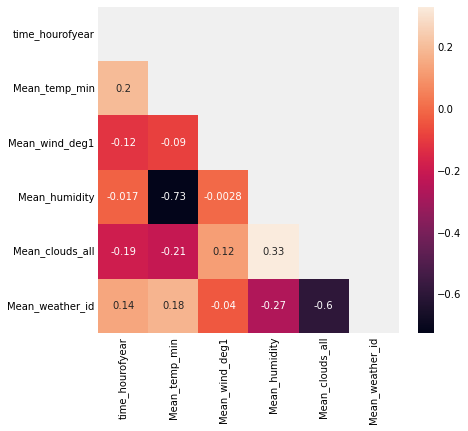

In [51]:
# Mean of varibles (as selected using variance threshold of 0.035) across cities

x_select_vt = x_select_cs1[list(X_norm_vt.columns)]
x_select_vt.head(2)
x_select_vt.shape
x_select_vt.describe().T

# Correlation and p-value of x and y

print('', end="\n")
x_select_vt_y = x_select_vt.join(y_0)
p_values(x_select_vt_y, dec_place=6, p_value_threshold=0.1)

# Show correlation heatmap and list columns with high correlation x_mean1

vt_corrs = x_select_vt.corr()
corr_heatmap(vt_corrs, diag_len=6, corr_threshold=0.8, annot=True)
print("correlations between selected variables minimal")

### 3.5. Investigate OLS fit summary using the various model dataframe so far

In [52]:
# Function to fit model

def fit_model(df, y=y_0):
    df_fit = df.copy()
    y_name = ''.join([col for col in y.columns])
    X_name = [col for col in df_fit.columns]

    # Build OLS formula string " y ~ X "

    formula_str = y_name+" ~ "+" + ".join(X_name)

    model = sfa.ols(formula=formula_str, data=df_fit.join(y))
    fitted = model.fit()
    print(fitted.summary())
    
# Fit model of all x varible

fit_model(x_0)

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     41.70
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        15:27:42   Log-Likelihood:                -86453.
No. Observations:                8763   AIC:                         1.730e+05
Df Residuals:                    8709   BIC:                         1.734e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.307e+05 

In [53]:
# Fit model using varible means across cities

x_select_cs.shape
fit_model(x_select_cs)

(8763, 12)

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     90.19
Date:                Tue, 17 May 2022   Prob (F-statistic):          5.69e-211
Time:                        15:27:45   Log-Likelihood:                -86933.
No. Observations:                8763   AIC:                         1.739e+05
Df Residuals:                    8750   BIC:                         1.740e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.712e+04   3792.931     

In [54]:
# Fit model using selected varible means across cities

x_select_cs1.shape
fit_model(x_select_cs1)

(8763, 10)

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     100.7
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.57e-198
Time:                        15:27:47   Log-Likelihood:                -86967.
No. Observations:                8763   AIC:                         1.740e+05
Df Residuals:                    8752   BIC:                         1.740e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.446e+04   6992.792     

In [55]:
# Fit model using selected mean varibles across cities (using variance threshold)

x_select_vt.shape
fit_model(x_select_vt)

(8763, 6)

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 17 May 2022   Prob (F-statistic):          8.67e-182
Time:                        15:27:50   Log-Likelihood:                -87015.
No. Observations:                8763   AIC:                         1.740e+05
Df Residuals:                    8756   BIC:                         1.741e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.651e+04   3686.305     

In [62]:
x_select_vt.head()

time_hourofyear  Mean_temp_min  Mean_wind_deg1  Mean_humidity  \
0                3     272.086456      133.000000      71.333333   
1                6     272.799533      180.000000      71.333333   
2                9     277.224046      270.166667      67.111111   
3               12     283.351587      236.333333      58.555556   
4               15     283.134500      222.500000      58.111111   

   Mean_clouds_all  Mean_weather_id  
0         0.000000            800.0  
1         0.000000            800.0  
2         0.000000            800.0  
3         0.000000            800.0  
4         0.666667            800.0

### 3.6. TS

In [56]:
x_TS = df_train_clean[["time"]].join(other = [x_temp_min["Mean_temp_min"], x_humidity["Mean_humidity"], x_wind_deg1["Mean_wind_deg1"],
                                              x_clouds_all["Mean_clouds_all"], x_weather_id["Mean_weather_id"], y_0])
x_TS.rename(columns = {'time':'date'}, inplace = True)
x_TS.tail().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

<AxesSubplot:xlabel='date', ylabel='Mean_temp_min'>

Text(0.5, 1.0, 'Feature: Mean_temp_min')

Text(0, 0.5, 'Mean_temp_min')

(16436.0, 17531.875)

<AxesSubplot:xlabel='date', ylabel='Mean_humidity'>

Text(0.5, 1.0, 'Feature: Mean_humidity')

Text(0, 0.5, 'Mean_humidity')

(16436.0, 17531.875)

<AxesSubplot:xlabel='date', ylabel='Mean_wind_deg1'>

Text(0.5, 1.0, 'Feature: Mean_wind_deg1')

Text(0, 0.5, 'Mean_wind_deg1')

(16436.0, 17531.875)

<AxesSubplot:xlabel='date', ylabel='Mean_clouds_all'>

Text(0.5, 1.0, 'Feature: Mean_clouds_all')

Text(0, 0.5, 'Mean_clouds_all')

(16436.0, 17531.875)

<AxesSubplot:xlabel='date', ylabel='Mean_weather_id'>

Text(0.5, 1.0, 'Feature: Mean_weather_id')

Text(0, 0.5, 'Mean_weather_id')

(16436.0, 17531.875)

<AxesSubplot:xlabel='date', ylabel='load_shortfall_3h'>

Text(0.5, 1.0, 'Feature: load_shortfall_3h')

Text(0, 0.5, 'load_shortfall_3h')

(16436.0, 17531.875)

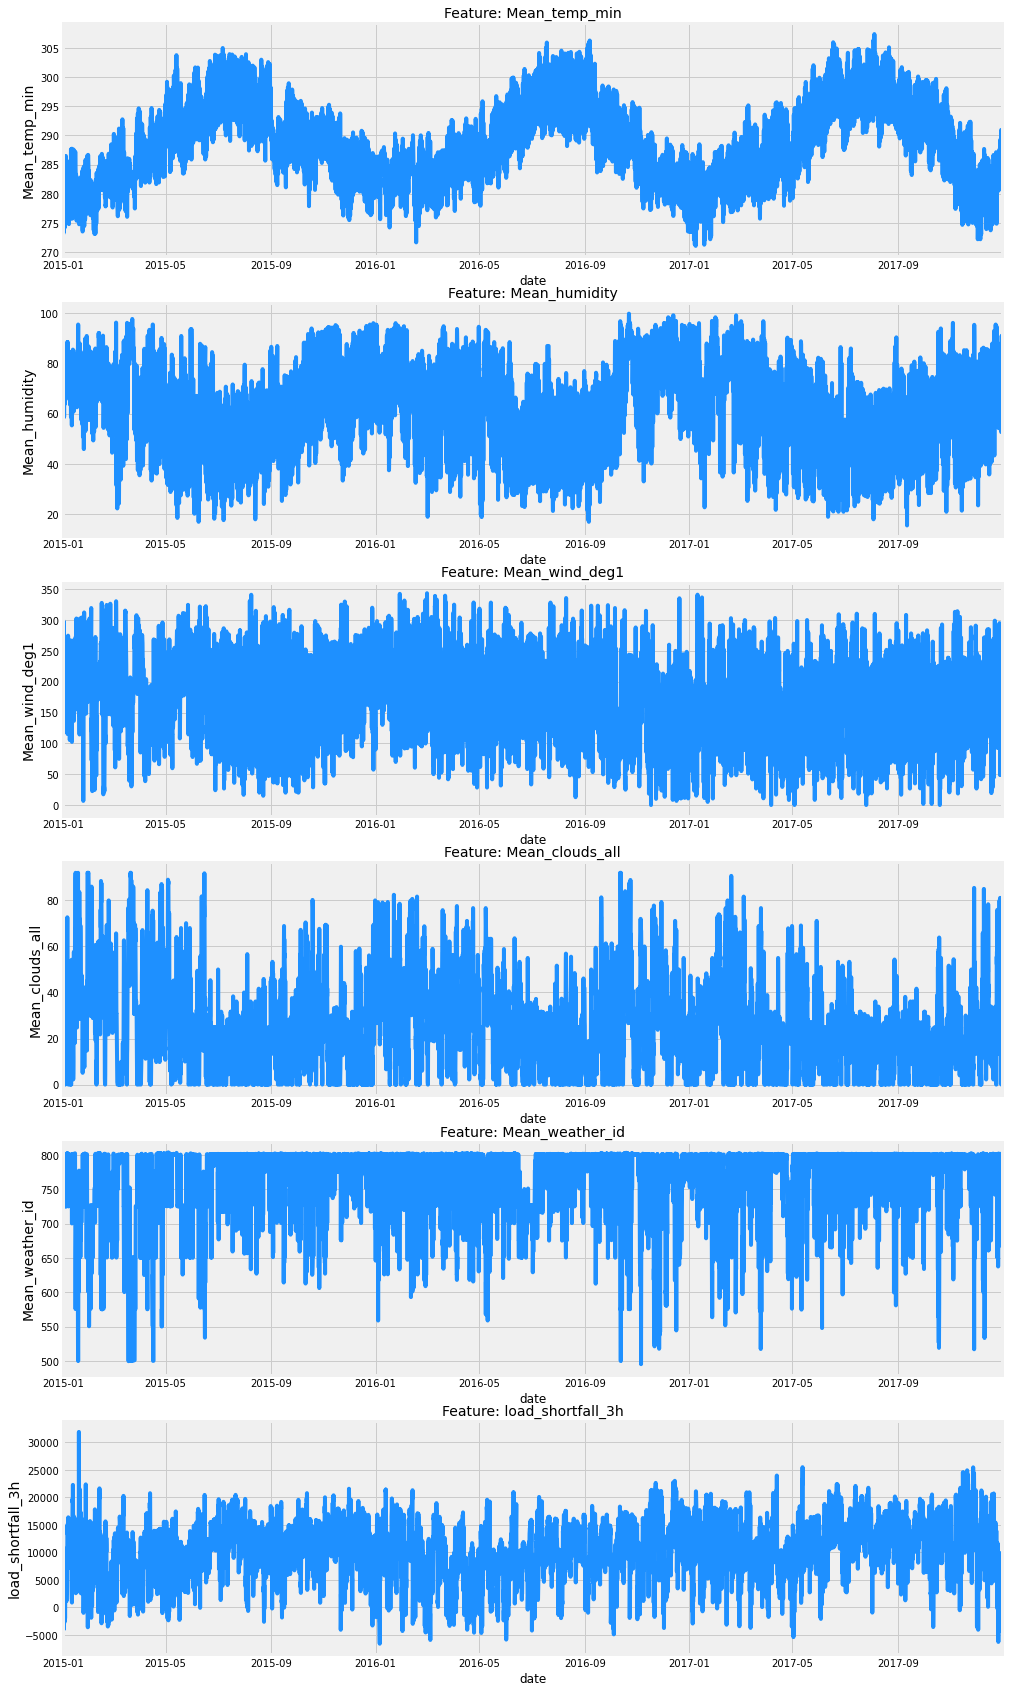

In [57]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))

for i, column in enumerate(x_TS.drop('date', axis=1).columns):
    sns.lineplot(x=x_TS['date'], y=x_TS[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([pd.Timestamp('2015-01-01 00:00:00'), pd.Timestamp('2017-12-31 21:00:00')])

<AxesSubplot:xlabel='date', ylabel='Mean_humidity'>

Text(0.5, 1.0, 'Mean_humidity_3h')

<AxesSubplot:xlabel='date', ylabel='Mean_humidity'>

Text(0.5, 1.0, 'Weekly Mean_humidity')

<AxesSubplot:xlabel='date', ylabel='Mean_humidity'>

Text(0.5, 1.0, 'Monthly Mean_humidity')

(16436.0, 17531.875)

(16436.0, 17531.875)

(16436.0, 17531.875)

<AxesSubplot:xlabel='date', ylabel='Mean_temp_min'>

Text(0.5, 1.0, 'Mean_temp_min_3h')

<AxesSubplot:xlabel='date', ylabel='Mean_temp_min'>

Text(0.5, 1.0, 'Weekly Mean_temp_min')

<AxesSubplot:xlabel='date', ylabel='Mean_temp_min'>

Text(0.5, 1.0, 'Monthly Mean_temp_min')

(16436.0, 17531.875)

(16436.0, 17531.875)

(16436.0, 17531.875)

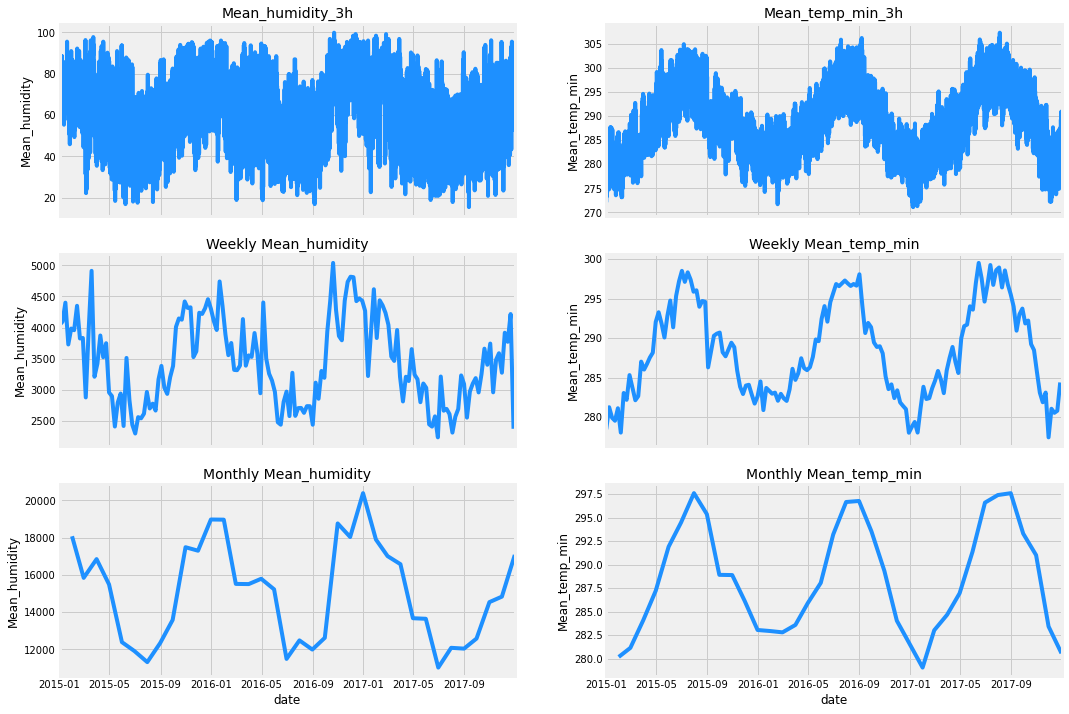

In [674]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(x_TS['date'], x_TS['Mean_humidity'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Mean_humidity_3h', fontsize=14)

resampled_df = x_TS[['date','Mean_humidity']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['Mean_humidity'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Mean_humidity', fontsize=14)

resampled_df = x_TS[['date','Mean_humidity']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['Mean_humidity'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Mean_humidity', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([pd.Timestamp('2015-01-01 00:00:00'), pd.Timestamp('2017-12-31 21:00:00')])

sns.lineplot(x_TS['date'], x_TS['Mean_temp_min'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Mean_temp_min_3h', fontsize=14)

resampled_df = x_TS[['date','Mean_temp_min']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['Mean_temp_min'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Mean_temp_min', fontsize=14)

resampled_df = x_TS[['date','Mean_temp_min']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['Mean_temp_min'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Mean_temp_min', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([pd.Timestamp('2015-01-01 00:00:00'), pd.Timestamp('2017-12-31 21:00:00')])
plt.show()


In [ ]:
x_TS

In [ ]:
# As we can see, downsample to weekly could smooth the data and hgelp with analysis
downsample = x_TS[["date", "load_shortfall_3h", "Mean_temp_min", "Mean_humidity", "Mean_wind_deg1", "Mean_clouds_all", "Mean_weather_id"
                ]].resample('7D', on='date').mean().reset_index(drop=False)
downsample.rename(columns = {'load_shortfall_3h':'load_shortfall'}, inplace = True)
df = downsample.copy()
df

In [ ]:
# check columns containing negative values

df['load_shortfall']

# check columns containing negative values

# df_train_clean_sort.columns[(df_train_clean_sort < 0).any()].tolist()
# df_train_clean_sort[(df_train_clean_sort[df_train_clean_sort.columns] < 0).any(axis=1)][['load_shortfall_3h']].T

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['load_shortfall'].values)
result

In [ ]:
# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['Mean_temp_min'].values, 'Mean_temp_min', ax[0, 0])
visualize_adfuller_results(df['Mean_humidity'].values, 'Mean_humidity', ax[1, 0])
visualize_adfuller_results(df['Mean_wind_deg1'].values, 'Mean_wind_deg1', ax[0, 1])
visualize_adfuller_results(df['Mean_clouds_all'].values, 'Mean_clouds_all', ax[1, 1])
visualize_adfuller_results(df['Mean_weather_id'].values, 'Mean_weather_id', ax[2, 0])
visualize_adfuller_results(df['load_shortfall'].values, 'load_shortfall', ax[2, 1])

plt.tight_layout()
plt.show()

In [ ]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['load_shortfall_log'] = np.log(abs(df['load_shortfall']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['load_shortfall_log'], 'Transformed \n load_shortfall', ax[0])

sns.distplot(df['load_shortfall_log'], ax=ax[1])

Differencing can be done in different orders:
* First order differencing: linear trends with $z_i = y_i - y_{i-1}$
* Second-order differencing: quadratic trends with $z_i = (y_i - y_{i-1}) - (y_{i-1} - y_{i-2})$
* and so on...

In [ ]:
# First Order Differencing
ts_diff = np.diff(df['load_shortfall'])
df['load_shortfall_diff_1'] = np.append([0], ts_diff)
df['load_shortfall_diff_1']
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['load_shortfall_diff_1'], 'Differenced (1. Order) \n load_shortfall', ax)

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].tail()

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')
ax.set_xlim([pd.Timestamp('2015-01-01 00:00:00'), pd.Timestamp('2017-12-31 21:00:00')])
plt.show()

In [ ]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'Mean_temp_min', 'Mean_humidity', 'Mean_wind_deg1', 
    'Mean_clouds_all', 'Mean_weather_id', 'load_shortfall'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['Mean_temp_min', 'load_shortfall']):
    
    res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [ ]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

In [ ]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 18))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([pd.Timestamp('2015-01-01 00:00:00'), pd.Timestamp('2017-12-31 21:00:00')])
    
plt.tight_layout()
plt.show()

As we can see:
* **load_shortfall**: reaches its maximum around July and November and its minimum around January and April
* **Mean_temp_min**: reaches its maxmium around August and its minimum around January
* **Mean_humidity**: reaches its maxmium around January and minimum around July/August
* **Mean_wind_deg1**: reaches its maxmium around January and minimum around May and October
* **Mean_clouds_all**: reaches its maxmium around March and minimum around August
* **Mean_weather_id**: reaches its maxmium around March/April and minimum around August

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'load_shortfall_seasonal',         
    'Mean_temp_min_seasonal_shift_2m',
    'Mean_humidity_seasonal_shift_2m',
    'Mean_wind_deg1_seasonal_shift_b_1m',
    'Mean_clouds_all_seasonal_shift_3m',
    'Mean_weather_id_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['load_shortfall_diff_1'])
plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 4

X = df['date']
y = df['load_shortfall']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

Text(0.5, 1.0, 'Rolling Window with Adjusting Training Size (Split 1)')

Text(0.5, 1.0, 'Rolling Window with Constant Training Size (Split 1)')

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

Text(0.5, 1.0, 'Rolling Window with Adjusting Training Size (Split 2)')

Text(0.5, 1.0, 'Rolling Window with Constant Training Size (Split 2)')

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

Text(0.5, 1.0, 'Rolling Window with Adjusting Training Size (Split 3)')

Text(0.5, 1.0, 'Rolling Window with Constant Training Size (Split 3)')

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

<AxesSubplot:xlabel='date', ylabel='load_shortfall'>

Text(0.5, 1.0, 'Rolling Window with Adjusting Training Size (Split 4)')

Text(0.5, 1.0, 'Rolling Window with Constant Training Size (Split 4)')

(16436.0, 17531.875)

(16436.0, 17531.875)

(16436.0, 17531.875)

(16436.0, 17531.875)

(16436.0, 17531.875)

(16436.0, 17531.875)

(16436.0, 17531.875)

(16436.0, 17531.875)

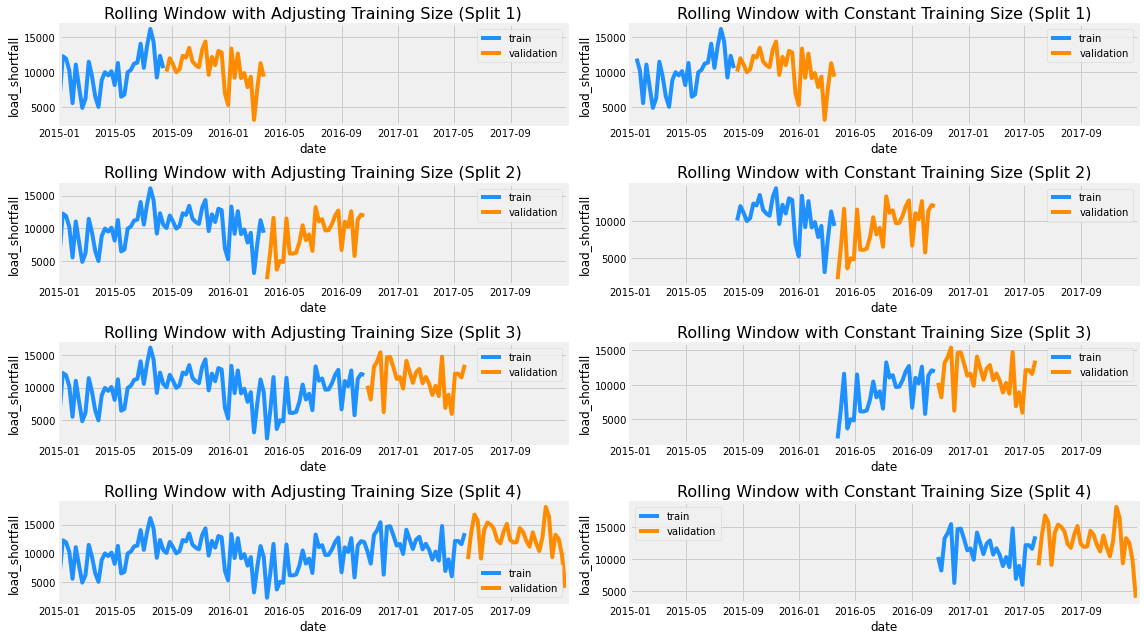

In [652]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([pd.Timestamp('2015-01-01 00:00:00'), pd.Timestamp('2017-12-31 21:00:00')])
    ax[i, 1].set_xlim([pd.Timestamp('2015-01-01 00:00:00'), pd.Timestamp('2017-12-31 21:00:00')])
    
plt.tight_layout()
plt.show()

The idea with this plot is to understand which train and test set are we using to fit the model in each iteration. 

In [684]:
# split data
feature_columns = ['Mean_temp_min', 'Mean_humidity', 'Mean_wind_deg1', 'Mean_clouds_all', 'Mean_weather_id']
target_column = ['load_shortfall']

df_x = df[feature_columns].copy()
df_y =df[target_column].copy()

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.15, shuffle=False)

lr1 = LinearRegression()
fit1 = lr1.fit(X_train, y_train)
y_pred1 = fit1.predict(X_test)
print(f"\n{y_pred1}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred1))}\n")
print('R_squared:', r2_score(y_test, y_pred1))


[[11363.21909741]
 [12811.43766162]
 [11278.08814415]
 [11909.6729218 ]
 [12784.47380315]
 [12196.74285377]
 [12497.98050089]
 [10300.00843338]
 [10987.75157805]
 [11954.46119194]
 [11846.36536433]
 [11729.48778039]
 [11410.02773751]
 [11791.47940494]
 [11426.4041488 ]
 [ 9755.29936194]
 [ 9343.72213207]
 [10937.82431871]
 [ 9636.64296873]
 [ 8297.40408515]
 [ 9006.20235903]
 [ 9178.5468056 ]
 [ 9930.75089886]
 [ 9599.86360547]]
RMSE: 2984.083248505836

R_squared: -0.25150944882673953


In [686]:
df_x.shape
df_y.head(1)

(157, 5)

load_shortfall
0     6168.194969

Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

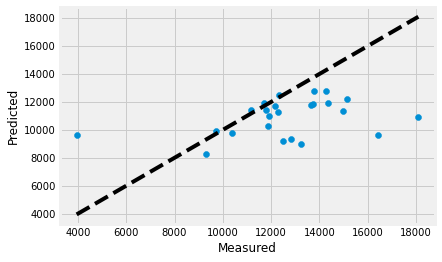

In [670]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [655]:
# df.head()

In [61]:
use =x_time.drop(labels="time_hourofyear", axis=1)
x_use = use.join(other = x_select_vt)
x_use.head(2)
x_use.shape

time_day  time_dayofyear  time_hour  time_month  time_weekday  \
0         1               1          3           1             3   
1         1               1          6           1             3   

   time_weeknumber  time_year  time_hourofyear  Mean_temp_min  Mean_wind_deg1  \
0                1       2015                3     272.086456           133.0   
1                1       2015                6     272.799533           180.0   

   Mean_humidity  Mean_clouds_all  Mean_weather_id  
0      71.333333              0.0            800.0  
1      71.333333              0.0            800.0

(8763, 13)

<a id="four"></a>
## 4. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [59]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression

In [60]:
x_use =

time_hourofyear  Mean_temp_min  Mean_wind_speed  Mean_wind_deg1  \
0                   3     272.086456         2.400000      133.000000   
1                   6     272.799533         2.066667      180.000000   
2                   9     277.224046         1.533333      270.166667   
3                  12     283.351587         1.866667      236.333333   
4                  15     283.134500         1.933333      222.500000   
...               ...            ...              ...             ...   
8758             8745     282.283333         2.133333      155.166667   
8759             8748     286.550000         3.933333      216.666667   
8760             8751     286.794600         6.200000      270.000000   
8761             8754     285.216667         5.400000      235.000000   
8762             8757     284.283333         3.800000      205.000000   

      Mean_pressure1  Mean_rain_3h  Mean_humidity  Mean_clouds_all  \
0        1003.000000           0.0      71.333333         0.000000   
1        1004.222222           0.0      71.333333         0.000000   
2        1005.111111           0.0      67.111111         0.000000   
3        1013.222222           0.0      58.555556         0.000000   
4        1029.555556           0.0      58.111111         0.666667   
...              ...           ...            ...              ...   
8758     1019.888889           0.0      85.333333        60.555556   
8759     1020.000000           0.0      69.111111        62.222222   
8760     1016.222222           0.0      61.111111        60.555556   
8761     1021.111111           0.0      63.888889        57.222222   
8762     1023.000000           0.0      65.777778        17.777778   

      Mean_snow_3h  Mean_weather_id  
0              0.0       800.000000  
1              0.0       800.000000  
2              0.0       800.000000  
3              0.0       800.000000  
4              0.0       800.000000  
...            ...              ...  
8758           0.0       775.083333  
8759           0.0       791.833333  
8760           0.0       726.500000  
8761           0.0       684.125000  
8762           0.0       800.666667  

[8763 rows x 10 columns]

### Custom Data Transformer using Scikit-Learn

In [488]:
# split data

X_train, X_test, y_train, y_test = train_test_split(x_use,
                                                    y_0,
                                                    test_size=0.15,
                                                    shuffle=False)

In [489]:
lr1 = LinearRegression()
fit1 = lr1.fit(X_train, y_train)
pred1 = fit1.predict(X_test)
print(f"\n{pred1}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred1))}\n")
print('R_squared:', r2_score(y_test, pred1))


[[12394.51730936]
 [12859.08770366]
 [14344.92057569]
 ...
 [10443.5626727 ]
 [10651.02217386]
 [12316.58864663]]
RMSE: 4731.182503358075

R_squared: 0.07863731397521312


In [470]:
h = pd.DataFrame(pred1)
h.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
g =  pd.concat([h, y_test], axis = 1).T
g

0             1             2             3     \
0                  11679.067465   9143.409588   9453.978426   9764.547263   
load_shortfall_3h  16075.333333  15722.666667  12181.666667  10992.666667   

                           4             5             6             7     \
0                  10075.116101  10385.684938  10696.253775  11006.822613   
load_shortfall_3h  11060.000000  12275.000000  10084.666667   7974.000000   

                           8             9     ...          1743  \
0                  11317.391450   8781.733574  ...  13069.879660   
load_shortfall_3h   9904.666667  11562.666667  ...   4215.333333   

                           1744          1745          1746          1747  \
0                  13380.448498  10844.790621  11155.359459  11465.928296   
load_shortfall_3h   7674.666667   7801.000000   3702.666667   -380.666667   

                           1748          1749          1750          1751  \
0                  11776.497134  12087.065971  12397.634808  12708.203646   
load_shortfall_3h    -28.333333   2266.666667    822.000000   -760.000000   

                           1752  
0                  13018.772483  
load_shortfall_3h   2780.666667  

[2 rows x 1753 columns]

Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

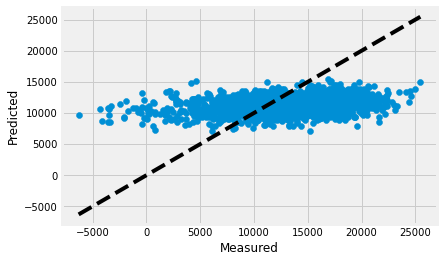

In [477]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [503]:
predicted = cross_val_predict(fit1, X_test, y_test, cv=10)
print(f"\n{predicted}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predicted))}\n")


[[10975.14262738]
 [11280.08952019]
 [11826.78185455]
 ...
 [13984.23520734]
 [14141.35262426]
 [15476.47044856]]
RMSE: 4954.112457583397



Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

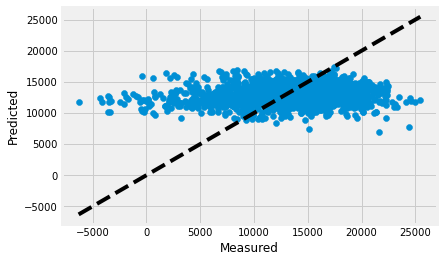

In [406]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

### Random Forest

In [515]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_use)

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y_0,test_size=0.15, shuffle=False)


from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=137)
fit2 = RF.fit(x_train,y_train)


from sklearn.metrics import mean_squared_error


# Get predictions
y_pred = fit2.predict(x_test)
# y_pred = cross_val_predict(fit2, X_test, y_test, cv=10)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print('R_squared:', r2_score(y_test, y_pred))

RMSE: 4239.548051180385
R_squared: 0.26017271935524633


Text(0.5, 1.0, 'Actual vs Predicted')

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

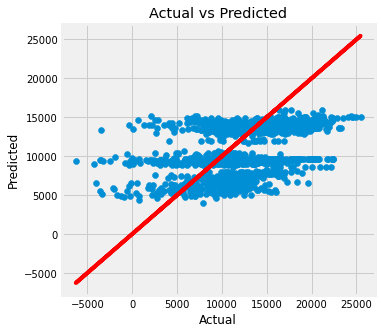

In [465]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

<a id="five"></a>
## 5. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="six"></a>
## 6. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic